# **Milestone 1 Phase 2**

# **I. Perkenalan**

Nama : Muhammad Farhan Darmawan

Batch : RMT 019

## Objective

Problem Statement :

Build an Artificial Neural Network to predict whether customers no longer use the product or stay

Introduction :

The company you work for struggle with their customer and want to know if the customer will stay or no longer use their product. They want to minimize the risk to lose their customer and decrease their revenue. To predict the customer I will use an Artificial Neural Networks method

Dataset Description :

Column	| Description
--- | ---
user_id	| ID of a customer
age	| Age of a customer
gender	| Gender of a customer
region_category	| Region that a customer belongs to
membership_category	| Category of the membership that a customer is using
joining_date | Date when a customer became a member
joined_through_referral	| Whether a customer joined using any referral code or ID
preferred_offer_types | Type of offer that a customer prefers
medium_of_operation	| Medium of operation that a customer uses for transactions
internet_option	| Type of internet service a customer uses
last_visit_time	| The last time a customer visited the website
days_since_last_login	| Number of days since a customer last logged into the website
avg_time_spent	| Average time spent by a customer on the website
avg_transaction_value	| Average transaction value of a customer
avg_frequency_login_days	| Number of times a customer has logged in to the website
points_in_wallet	| Points awarded to a customer on each transaction
used_special_discount	| Whether a customer uses special discounts offered
offer_application_preference	| Whether a customer prefers offers
past_complaint	| Whether a customer has raised any complaints
complaint_status	| Whether the complaints raised by a customer was resolved
feedback	| Feedback provided by a customer
churn_risk_score	| Churn score (0 : Not churn, 1 : Chur) 
                      

# **II. Import Libraries**

In [1]:
# Import Libraries

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

# Preprocess
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn. preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer

# Correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.stats import chi2_contingency

# Tensorflow Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Tensorflow Fucntional
from tensorflow.keras.layers import Input, concatenate, Dropout, BatchNormalization
from tensorflow.keras import Model

from tensorflow.keras.models import load_model

# Evaluation
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score 

from dataprep.eda import plot, plot_missing, plot_correlation, create_report

# **III. Data Loading**

In [2]:
# Loading data

data = pd.read_csv('churn.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Menampilkan 10 data teratas
data.head(10)

user_id  age gender region_category  membership_category  \
0  9f420209e7d129f3   29      F             NaN        No Membership   
1  ac6e97806267549e   50      M             NaN     Basic Membership   
2  a6aa19b1580eed4e   26      F            City    Silver Membership   
3  aeee343277211c2f   63      F         Village        No Membership   
4  82448b5c8ce6390c   64      M            Town    Silver Membership   
5  96fbb6f63244b1f4   35      M            Town   Premium Membership   
6  a52bc51378ecb057   43      M             NaN      Gold Membership   
7  94f338d20bf0f2b2   15      M            City        No Membership   
8  85c7996b17862e57   49      M            Town  Platinum Membership   
9  8a1625846d7a198b   35      F            Town     Basic Membership   

  joining_date joined_through_referral     preferred_offer_types  \
0   2017-04-05                     Yes            Without Offers   
1   2017-03-31                     Yes            Without Offers   
2   2017-02-11                     NaN  Credit/Debit Card Offers   
3   2015-12-23                      No  Credit/Debit Card Offers   
4   2015-03-20                     NaN     Gift Vouchers/Coupons   
5   2016-08-16                      No  Credit/Debit Card Offers   
6   2017-03-09                     Yes     Gift Vouchers/Coupons   
7   2016-09-11                      No  Credit/Debit Card Offers   
8   2017-04-24                     Yes            Without Offers   
9   2016-12-01                     Yes  Credit/Debit Card Offers   

  medium_of_operation internet_option last_visit_time  days_since_last_login  \
0                 NaN           Wi-Fi        22:29:49                      4   
1             Desktop     Fiber_Optic        15:44:56                     11   
2                 NaN     Fiber_Optic        20:31:53                      8   
3             Desktop     Fiber_Optic        14:28:05                     10   
4          Smartphone           Wi-Fi        04:16:48                      9   
5                 NaN           Wi-Fi        14:50:53                     20   
6          Smartphone     Mobile_Data        15:14:20                     11   
7          Smartphone           Wi-Fi        04:32:35                      8   
8                 NaN     Fiber_Optic        18:26:30                      3   
9             Desktop     Mobile_Data        07:58:44                      5   

   avg_time_spent  avg_transaction_value  avg_frequency_login_days  \
0     1184.490000               38604.69                      10.0   
1      338.150000                7665.66                      17.0   
2      235.140000               37671.69                       5.0   
3       56.670000               15678.14                      11.0   
4      153.990000                8422.68                       0.0   
5     1397.318999               29664.01                      28.0   
6      416.300000               13160.39                      24.0   
7       34.070000                9151.14                      29.0   
8      650.120000               81628.48                      11.0   
9      106.230000               28232.59                      16.0   

   points_in_wallet used_special_discount offer_application_preference  \
0         627.48000                   Yes                          Yes   
1         575.97000                   Yes                           No   
2         767.93000                   Yes                           No   
3         590.22000                    No                          Yes   
4         722.04000                   Yes                           No   
5         782.49000                    No                          Yes   
6         712.94000                   Yes                           No   
7         655.43000                   Yes                           No   
8           0.00000                   Yes                          Yes   
9         984.93392                    No                          Yes   

  p

In [4]:
# Menampilkan 10 data terbawah
data.tail(10)

user_id  age gender region_category membership_category  \
37000  8a0fff47b7846031   25      F            Town       No Membership   
37001  8832eec42dc0e347   38      M            Town   Silver Membership   
37002  b9d9761f4d367c7a   49      F            City       No Membership   
37003  a38816e7522f5f7b   42      F            Town    Basic Membership   
37004  8968d0458164dda9   19      F            Town     Gold Membership   
37005  924e9c06f0c73817   36      M            Town     Gold Membership   
37006  90e22286ac0acf04   27      F            City     Gold Membership   
37007  9329a6297407334a   20      M             NaN     Gold Membership   
37008  a4403ddda8fcf9f3   38      F            City     Gold Membership   
37009  93b5d0330d24fa15   36      M            Town     Gold Membership   

      joining_date joined_through_referral     preferred_offer_types  \
37000   2017-01-20                      No     Gift Vouchers/Coupons   
37001   2016-09-19                     NaN  Credit/Debit Card Offers   
37002   2017-12-12                     NaN            Without Offers   
37003   2017-07-05                     Yes     Gift Vouchers/Coupons   
37004   2016-07-17                     Yes            Without Offers   
37005   2015-03-05                     NaN  Credit/Debit Card Offers   
37006   2017-01-15                     Yes            Without Offers   
37007   2015-07-11                     Yes            Without Offers   
37008   2016-05-25                     Yes            Without Offers   
37009   2016-10-18                     NaN            Without Offers   

      medium_of_operation internet_option last_visit_time  \
37000          Smartphone           Wi-Fi        17:53:32   
37001          Smartphone           Wi-Fi        17:42:11   
37002                Both           Wi-Fi        02:31:18   
37003                Both           Wi-Fi        21:42:42   
37004          Smartphone     Fiber_Optic        22:03:48   
37005                 NaN     Fiber_Optic        09:32:50   
37006             Desktop           Wi-Fi        02:28:52   
37007                 NaN     Mobile_Data        17:50:38   
37008             Desktop           Wi-Fi        17:07:57   
37009                Both     Fiber_Optic        03:50:49   

       days_since_last_login  avg_time_spent  avg_transaction_value  \
37000                      6      119.830000               13147.91   
37001                     19       34.790000               30820.83   
37002                     13      499.510000               17110.71   
37003                      3      529.580000               42964.11   
37004                     21      119.960000               14218.43   
37005                     15      199.330000               29455.29   
37006                     15      368.500000               27038.47   
37007                     13      272.130000               39305.35   
37008                   -999       65.070000               46108.73   
37009                      3      972.776679               26905.49   

       avg_frequency_login_days  points_in_wallet used_special_discount  \
37000                       0.0       1019.382051                   Yes   
37001                      23.0        631.830000                   Yes   
37002                      24.0        587.010000                   Yes   
37003                      18.0        619.280000                   Yes   
37004                       7.0        781.840000                   Yes   
37005                       9.0        846.520000                   Yes   
37006                       8.0        835.980000                    No   
37007                      27.0        714.900000                   Yes   
37008                       6.0        744.990000                    No   
37009                      22.0        700.930000                   Yes   

      offer_application_preference past_complaint          complaint_status  \
37000                           No    

In [5]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [6]:
# Cek duplikasi data
data.duplicated(keep = False).sum()

36

In [7]:
# Menampilkan data duplikasi
data[data.duplicated(keep = False)]

user_id  age gender region_category  membership_category  \
1035   854f5d6d5d9204d3   55      F            Town   Premium Membership   
1546   9f97903015fd0580   29      M             NaN    Silver Membership   
3321   9f97903015fd0580   29      M             NaN    Silver Membership   
7062   b0045613327d17fb   36      F            City  Platinum Membership   
7547   b36a10c24eab4cb0   44      M            Town    Silver Membership   
8807   930b39d136f072e3   56      M            Town   Premium Membership   
9092   9d20f093164c98a3   35      M             NaN  Platinum Membership   
9248   8f39faa74b6607e7   26      F            City   Premium Membership   
9505   b0045613327d17fb   36      F            City  Platinum Membership   
9856   b1074e2baf6845ce   17      M            City  Platinum Membership   
10231  9ba8bf4d1e50100c   47      F            Town      Gold Membership   
10282  a594feaffc78b36b   58      M            City     Basic Membership   
11478  9ba8bf4d1e50100c   47      F            Town      Gold Membership   
11615  859745861c61ebef   35      M            City    Silver Membership   
12589  8f39faa74b6607e7   26      F            City   Premium Membership   
14840  859745861c61ebef   35      M            City    Silver Membership   
15907  9c8c2db425854d5e   54      M             NaN  Platinum Membership   
16165  9c8c2db425854d5e   54      M             NaN  Platinum Membership   
16978  88555539f558f719   61      F            Town        No Membership   
18235  bb86a78fc96fcabd   39      M         Village      Gold Membership   
19771  a9b24338d4fcbb58   18      M            City      Gold Membership   
21335  9186d6f284e4ac5b   59      M            Town     Basic Membership   
22341  9186d6f284e4ac5b   59      M            Town     Basic Membership   
24693  930b39d136f072e3   56      M            Town   Premium Membership   
26214  a594feaffc78b36b   58      M            City     Basic Membership   
26687  9d20f093164c98a3   35      M             NaN  Platinum Membership   
27659  a121fe1247bf3d61   39      F            City      Gold Membership   
27908  b749631fc10ff0da   54      F            Town     Basic Membership   
28691  88555539f558f719   61      F            Town        No Membership   
29979  b36a10c24eab4cb0   44      M            Town    Silver Membership   
30331  b1074e2baf6845ce   17      M            City  Platinum Membership   
31884  b749631fc10ff0da   54      F            Town     Basic Membership   
33494  854f5d6d5d9204d3   55      F            Town   Premium Membership   
33813  a9b24338d4fcbb58   18      M            City      Gold Membership   
33913  a121fe1247bf3d61   39      F            City      Gold Membership   
36512  bb86a78fc96fcabd   39      M         Village      Gold Membership   

      joining_date joined_through_referral     preferred_offer_types  \
1035    2015-08-07                     Yes     Gift Vouchers/Coupons   
1546    2017-10-31                     NaN  Credit/Debit Card Offers   
3321    2017-10-31                     NaN  Credit/Debit Card Offers   
7062    2016-03-07                      No  Credit/Debit Card Offers   
7547    2016-06-29                     Yes     Gift Vouchers/Coupons   
8807    2015-09-18                     Yes     Gift Vouchers/Coupons   
9092    2016-06-08                      No     Gift Vouchers/Coupons   
9248    2015-10-05                     NaN  Credit/Debit Card Offers   
9505    2016-03-07                      No  Credit/Debit Card Offers   
9856    2015-09-06                     NaN     Gift Vouchers/Coupons   
10231   2016-07-10                      No  Credit/Debit Card Offers   
10282   2017-04-01                     Yes  Credit/Debit Card Offers   
11478   2016-07-10                      No  Credit/Debit Card Offers   
11615   2016-03-27                     Yes     Gift Vouchers/Coupons   
12589   2015-10-05                     NaN  Credit/Debit Card Offers   
14840   2016-03-27                     Yes     Gift

In [8]:
data[data['user_id'] == 'bb86a78fc96fcabd']

user_id  age gender region_category membership_category  \
18235  bb86a78fc96fcabd   39      M         Village     Gold Membership   
36512  bb86a78fc96fcabd   39      M         Village     Gold Membership   

      joining_date joined_through_referral  preferred_offer_types  \
18235   2016-09-27                     Yes  Gift Vouchers/Coupons   
36512   2016-09-27                     Yes  Gift Vouchers/Coupons   

      medium_of_operation internet_option last_visit_time  \
18235          Smartphone     Mobile_Data        22:03:32   
36512          Smartphone     Mobile_Data        22:03:32   

       days_since_last_login  avg_time_spent  avg_transaction_value  \
18235                      2          141.82               44951.45   
36512                      2          141.82               44951.45   

       avg_frequency_login_days  points_in_wallet used_special_discount  \
18235                       0.0        436.048229                   Yes   
36512                       0.0        436.048229                   Yes   

      offer_application_preference past_complaint     complaint_status  \
18235                           No            Yes  Solved in Follow-up   
36512                           No            Yes  Solved in Follow-up   

                  feedback  churn_risk_score  
18235  No reason specified                 1  
36512  No reason specified                 1

in user_id `bb86a78fc96fcabd` the data is duplicated

In [9]:
# Menampilkan matrix data
data.shape

(37010, 22)

# **IV. Exploratory Data Analysis**

## Data Cleaning

I drop user_id column because for exploratory data analysis this column means nothing

In [10]:
# drop column
data = data.drop(['user_id'], axis=1)

In [11]:
# change type to datetime
data['joining_date'] = pd.to_datetime(data['joining_date'])
data['last_visit_time'] = pd.to_datetime(data['last_visit_time'])

In [12]:
# extract year
data['joining_date_year'] = data['joining_date'].dt.year
data['last_visit_year'] = data['last_visit_time'].dt.year

Splitting columns into numerical and categorical

In [13]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

In [14]:
# Menampilkan informasi statistik pada data numerikal
data[num_cols].describe()

age  days_since_last_login  avg_time_spent  \
count  37010.000000           37010.000000    37010.000000   
mean      37.120697             -41.943502      279.201356   
std       15.866834             228.875324      330.017336   
min       10.000000            -999.000000        0.000000   
25%       23.000000               8.000000       60.122500   
50%       37.000000              12.000000      161.770000   
75%       51.000000              16.000000      356.525000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
count           37010.000000              37010.000000      37010.000000   
mean            29272.430216                 14.659540        623.590885   
std             19445.963492                  9.478756        270.218956   
min               800.460000                  0.000000          0.000000   
25%             14177.835000                  7.000000        574.220000   
50%             27554.485000                 14.000000        680.400000   
75%             40858.672500                 22.000000        756.990000   
max             99914.050000                 73.061995       2069.069761   

       churn_risk_score  joining_date_year  last_visit_year  
count      37010.000000       37010.000000          37010.0  
mean           0.540881        2016.006512           2023.0  
std            0.498333           0.819383              0.0  
min            0.000000        2015.000000           2023.0  
25%            0.000000        2015.000000           2023.0  
50%            1.000000        2016.000000           2023.0  
75%            1.000000        2017.000000           2023.0  
max            1.000000        2017.000000           2023.0

In [15]:
# Menampilkan informasi statistik pada data kategorikal
data[cat_cols].describe()

gender region_category membership_category joined_through_referral  \
count   36951           31579               37010                   31568   
unique      2               3                   6                       2   
top         F            Town    Basic Membership                      No   
freq    18497           14135                7727                   15846   

        preferred_offer_types medium_of_operation internet_option  \
count                   36722               31615           37010   
unique                      3                   3               3   
top     Gift Vouchers/Coupons             Desktop           Wi-Fi   
freq                    12357               13917           12417   

       used_special_discount offer_application_preference past_complaint  \
count                  37010                        37010          37010   
unique                     2                            2              2   
top                      Yes                          Yes             No   
freq                   20353                        20449          18611   

       complaint_status              feedback  
count             37010                 37010  
unique                5                     9  
top      Not Applicable  Poor Product Quality  
freq              18611                  6353

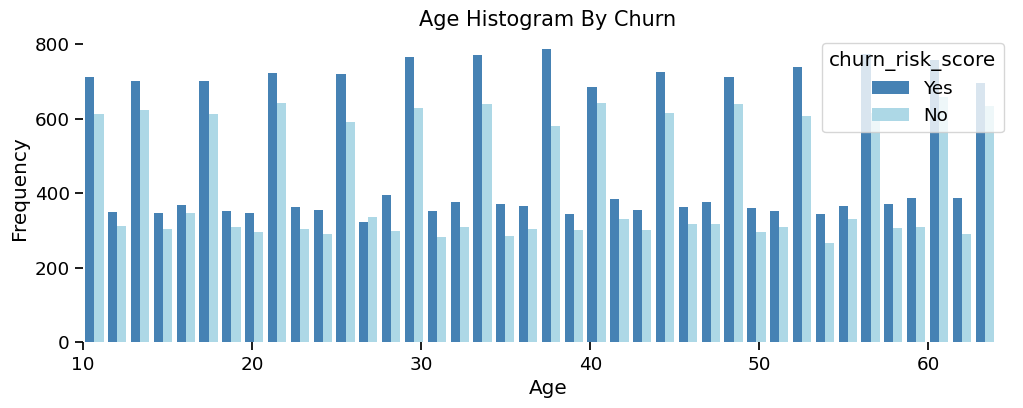

In [16]:
# Menampilkan grafik age
x1 = list(data[data['churn_risk_score'] == 1]['age'])
x2 = list(data[data['churn_risk_score'] == 0]['age'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([10,65])
plt.legend(['Yes', 'No'], title = 'churn_risk_score', loc='upper right', facecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram By Churn', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

The age of the customer distribute from 10 - 64 years old with a mean of 37 years old

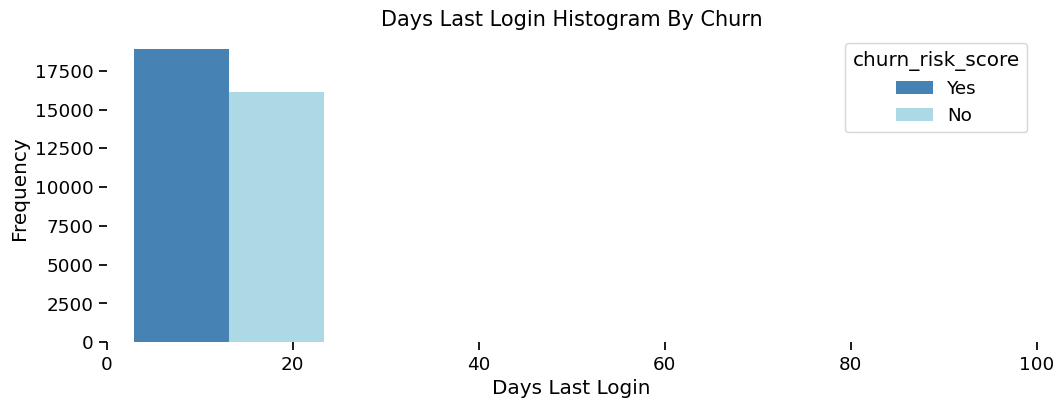

In [17]:
# Menampilkan grafik days last login
x1 = list(data[data['churn_risk_score'] == 1]['days_since_last_login'])
x2 = list(data[data['churn_risk_score'] == 0]['days_since_last_login'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,100])
plt.legend(['Yes', 'No'], title = 'churn_risk_score', loc='upper right', facecolor='white')
plt.xlabel('Days Last Login')
plt.ylabel('Frequency')
plt.title('Days Last Login Histogram By Churn', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

The longest last days of customer login is 26 days

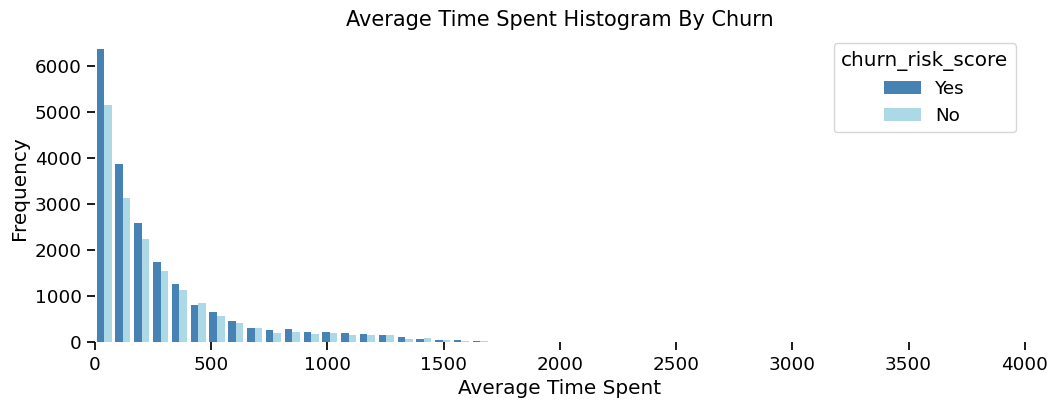

In [18]:
# Menampilkan grafik average time spent
x1 = list(data[data['churn_risk_score'] == 1]['avg_time_spent'])
x2 = list(data[data['churn_risk_score'] == 0]['avg_time_spent'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,4000])
plt.legend(['Yes', 'No'], title = 'churn_risk_score', loc='upper right', facecolor='white')
plt.xlabel('Average Time Spent')
plt.ylabel('Frequency')
plt.title('Average Time Spent Histogram By Churn', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

Means of average time spent by the customer on the website is 279 hours

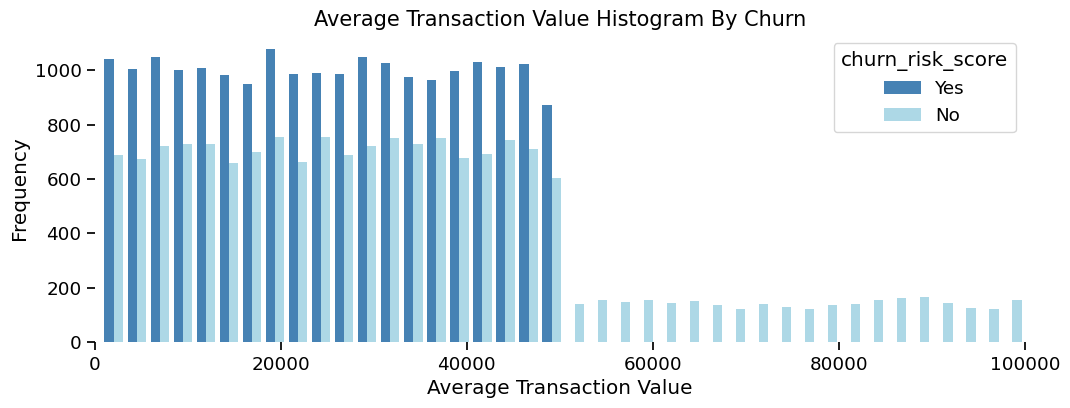

In [19]:
# Menampilkan grafik average transaction value
x1 = list(data[data['churn_risk_score'] == 1]['avg_transaction_value'])
x2 = list(data[data['churn_risk_score'] == 0]['avg_transaction_value'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,100000])
plt.legend(['Yes', 'No'], title = 'churn_risk_score', loc='upper right', facecolor='white')
plt.xlabel('Average Transaction Value')
plt.ylabel('Frequency')
plt.title('Average Transaction Value Histogram By Churn', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

From the average transaction value, of more than 50000 transactions the risk of the customer will churn are no, opposite that the risk of the customer will churn is possibility to churn

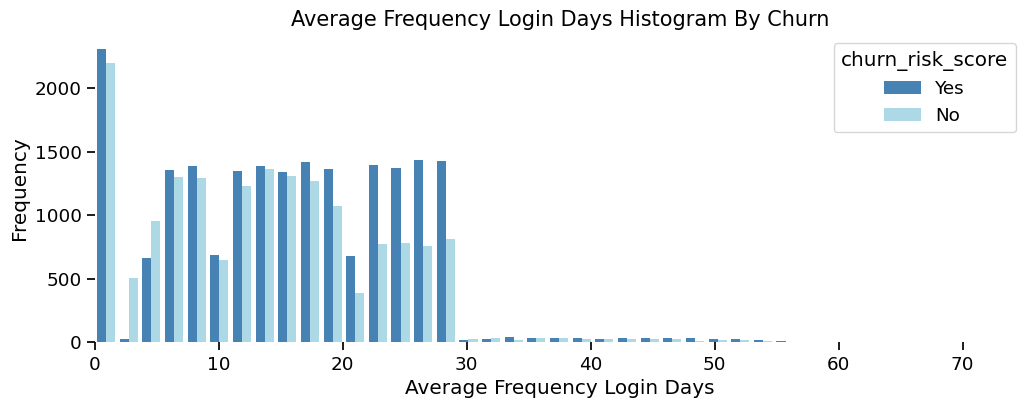

In [20]:
# Menampilkan grafik average frequency login days
x1 = list(data[data['churn_risk_score'] == 1]['avg_frequency_login_days'])
x2 = list(data[data['churn_risk_score'] == 0]['avg_frequency_login_days'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,75])
plt.legend(['Yes', 'No'], title = 'churn_risk_score', loc='upper right', facecolor='white')
plt.xlabel('Average Frequency Login Days')
plt.ylabel('Frequency')
plt.title('Average Frequency Login Days Histogram By Churn', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

By the average frequency of login days, the customer will log in 14 times a day

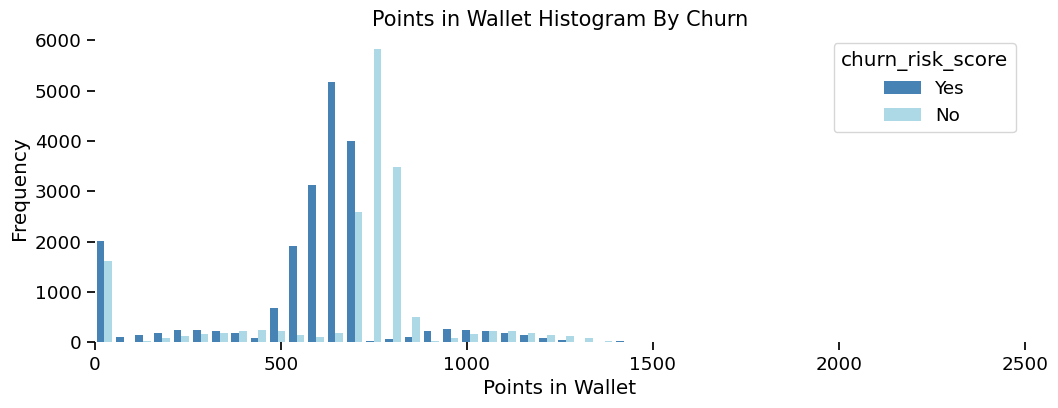

In [21]:
# Menampilkan grafik points in wallet
x1 = list(data[data['churn_risk_score'] == 1]['points_in_wallet'])
x2 = list(data[data['churn_risk_score'] == 0]['points_in_wallet'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,2500])
plt.legend(['Yes', 'No'], title = 'churn_risk_score', loc='upper right', facecolor='white')
plt.xlabel('Points in Wallet')
plt.ylabel('Frequency')
plt.title('Points in Wallet Histogram By Churn', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

The customer with < 750 points in the wallet risks churn than  points in the wallet > 750

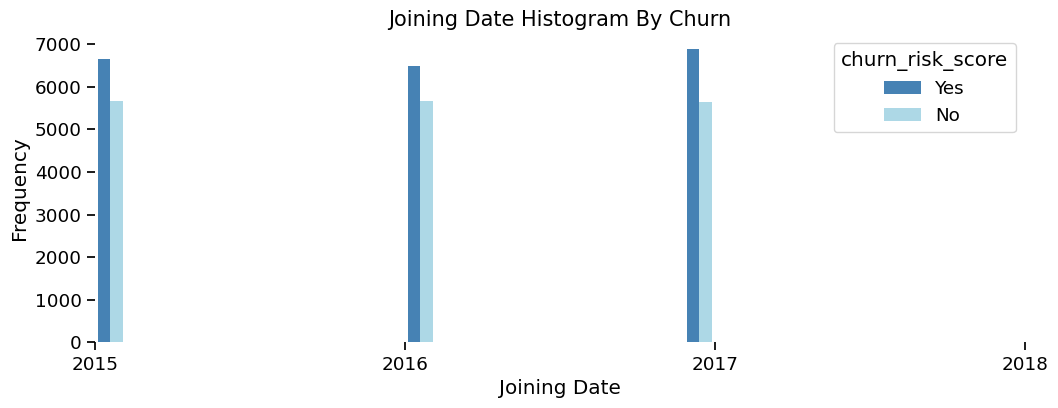

In [22]:
# Menampilkan grafik joining date
x1 = list(data[data['churn_risk_score'] == 1]['joining_date_year'])
x2 = list(data[data['churn_risk_score'] == 0]['joining_date_year'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 20, density=False, color=['steelblue', 'lightblue'])
plt.xlim([2015,2017])
plt.legend(['Yes', 'No'], title = 'churn_risk_score', loc='upper right', facecolor='white')
plt.xlabel('Joining Date')
plt.ylabel('Frequency')
plt.title('Joining Date Histogram By Churn', size=15)
plt.box(False)
plt.xticks([2015, 2016, 2017, 2018])
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

The first joining date of the customer is 2015 - 2017

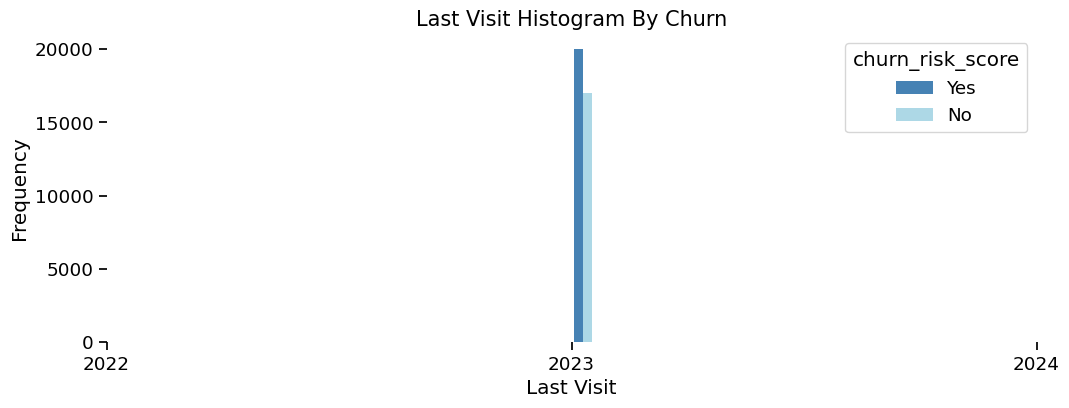

In [23]:
# Menampilkan grafik last visit
x1 = list(data[data['churn_risk_score'] == 1]['last_visit_year'])
x2 = list(data[data['churn_risk_score'] == 0]['last_visit_year'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 20, density=False, color=['steelblue', 'lightblue'])
plt.xlim([2022,2024])
plt.legend(['Yes', 'No'], title = 'churn_risk_score', loc='upper right', facecolor='white')
plt.xlabel('Last Visit')
plt.ylabel('Frequency')
plt.title('Last Visit Histogram By Churn', size=15)
plt.box(False)
plt.xticks([2022, 2023, 2024])
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

The last visit of the customer is 2023

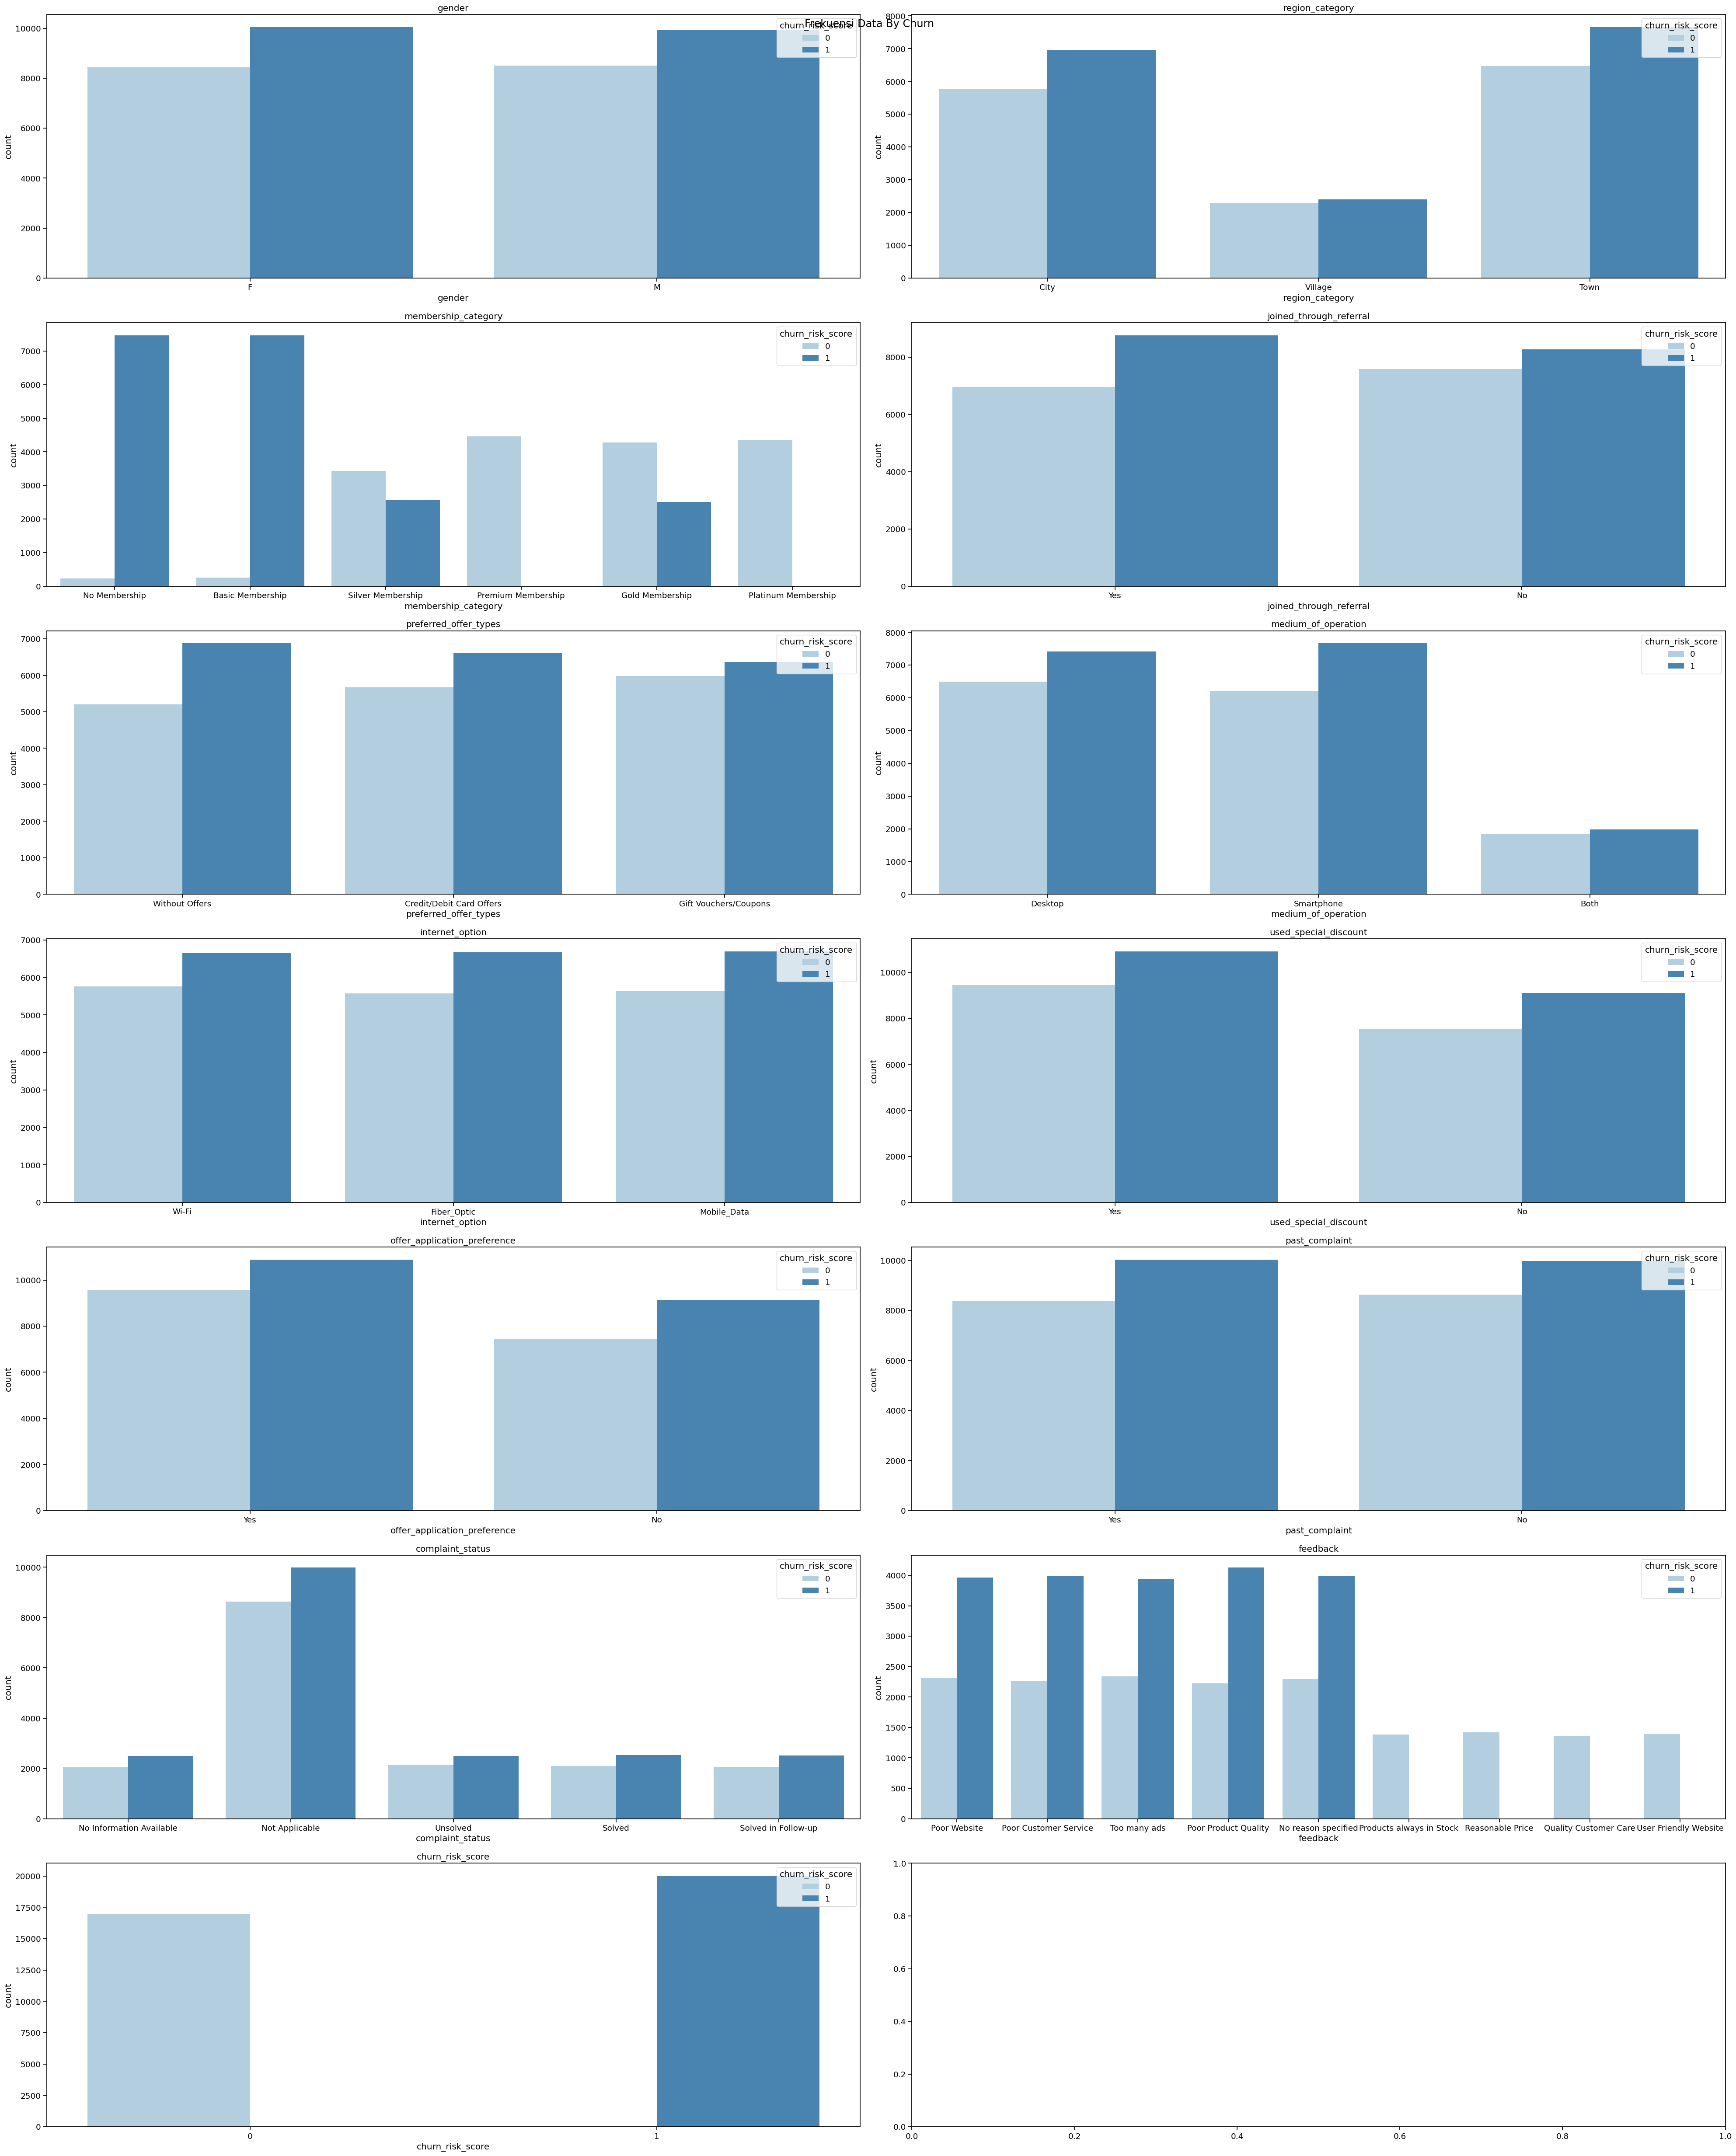

In [24]:
# Daftar nama kolom
cols = ['gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score']

# Membuat subplot
f, axes = plt.subplots(7, 2, figsize=(40, 50), facecolor='white')
f.suptitle('Frekuensi Data By Churn')

# Membuat looping
for i, column in enumerate(cols):
    row = i // 2  # Nomor baris subplot
    col = i % 2   # Nomor kolom subplot
    
    # Menampilkan countplot
    ax = sns.countplot(x=column, hue='churn_risk_score', data=data[cols], palette='Blues', ax=axes[row, col])
    ax.set_title(column)
    ax.legend(title='churn_risk_score', loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()

The analysis reveals important insights on customer churn. Churn rates are higher than non-churn, irrespective of gender. City and town regions exhibit a higher likelihood of churn. "No" and "basic" memberships correlate with higher churn. Negative feedback strongly indicates churn. Addressing these factors is crucial for businesses to retain customers and foster loyalty.

According to chartmogul.com, the ideal customer churn rate should be below 7%. Therefore, companies should take swift actions to address customer complaints, one of which is by adding dedicated staff to handle customer complaints

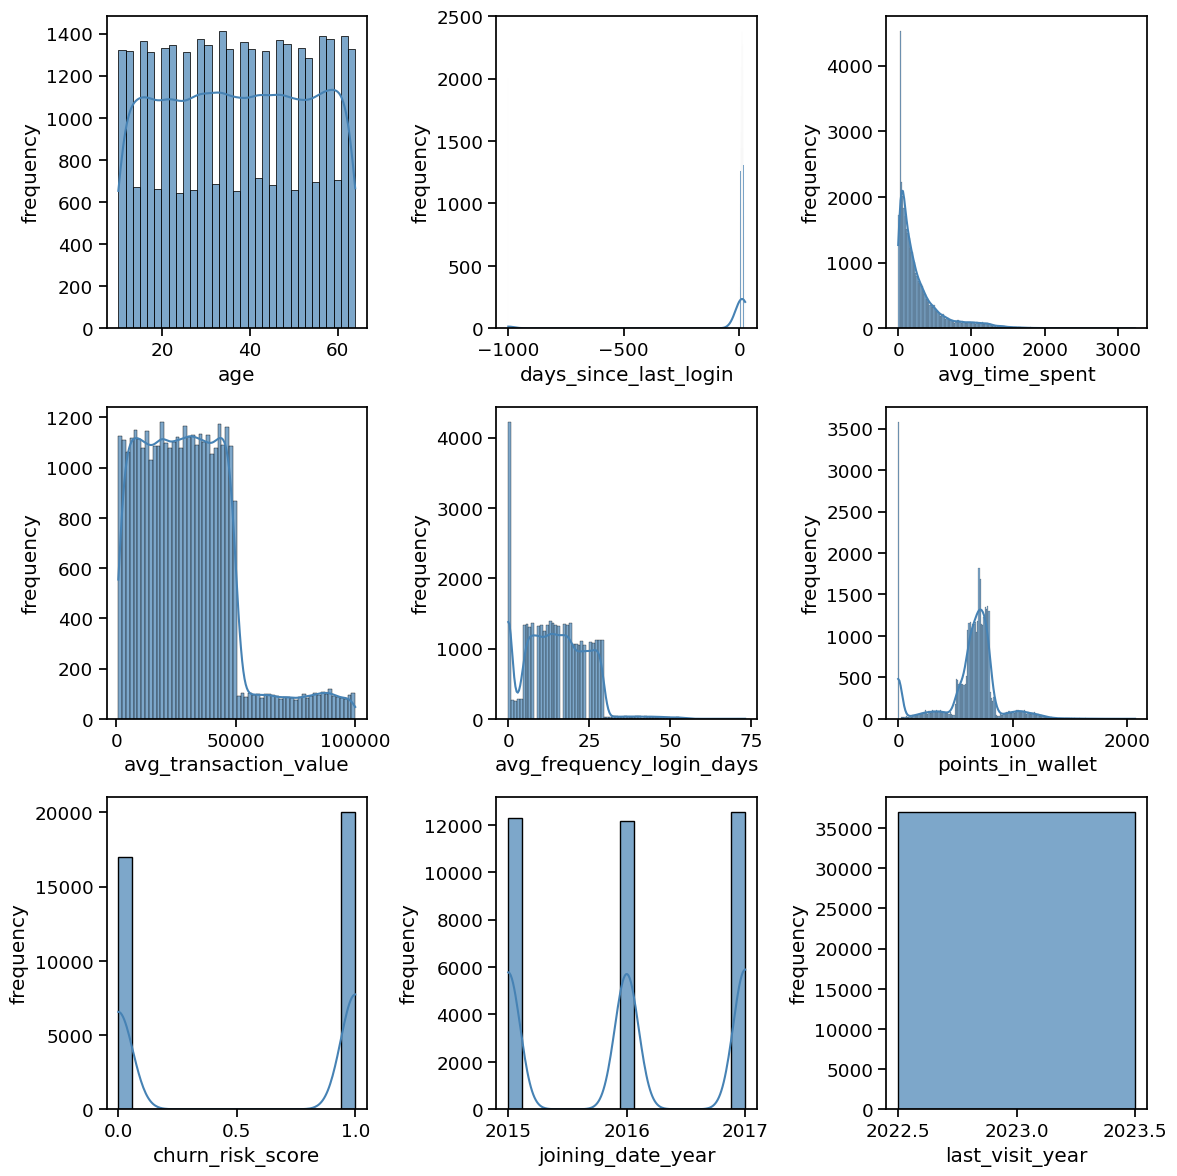

In [25]:
# Membuat subplot dengan ukuran 6 x 4
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Mendapatkan daftar kolom dalam DataFrame
columns = num_cols

# Melakukan looping untuk membuat histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        # Membuat histogram
        sns.histplot(data=data, x=columns[i], kde=True, color='steelblue', alpha=0.7, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel('frequency')

# Menyusun tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

From the histogram we've known that the distribution of data are skewed

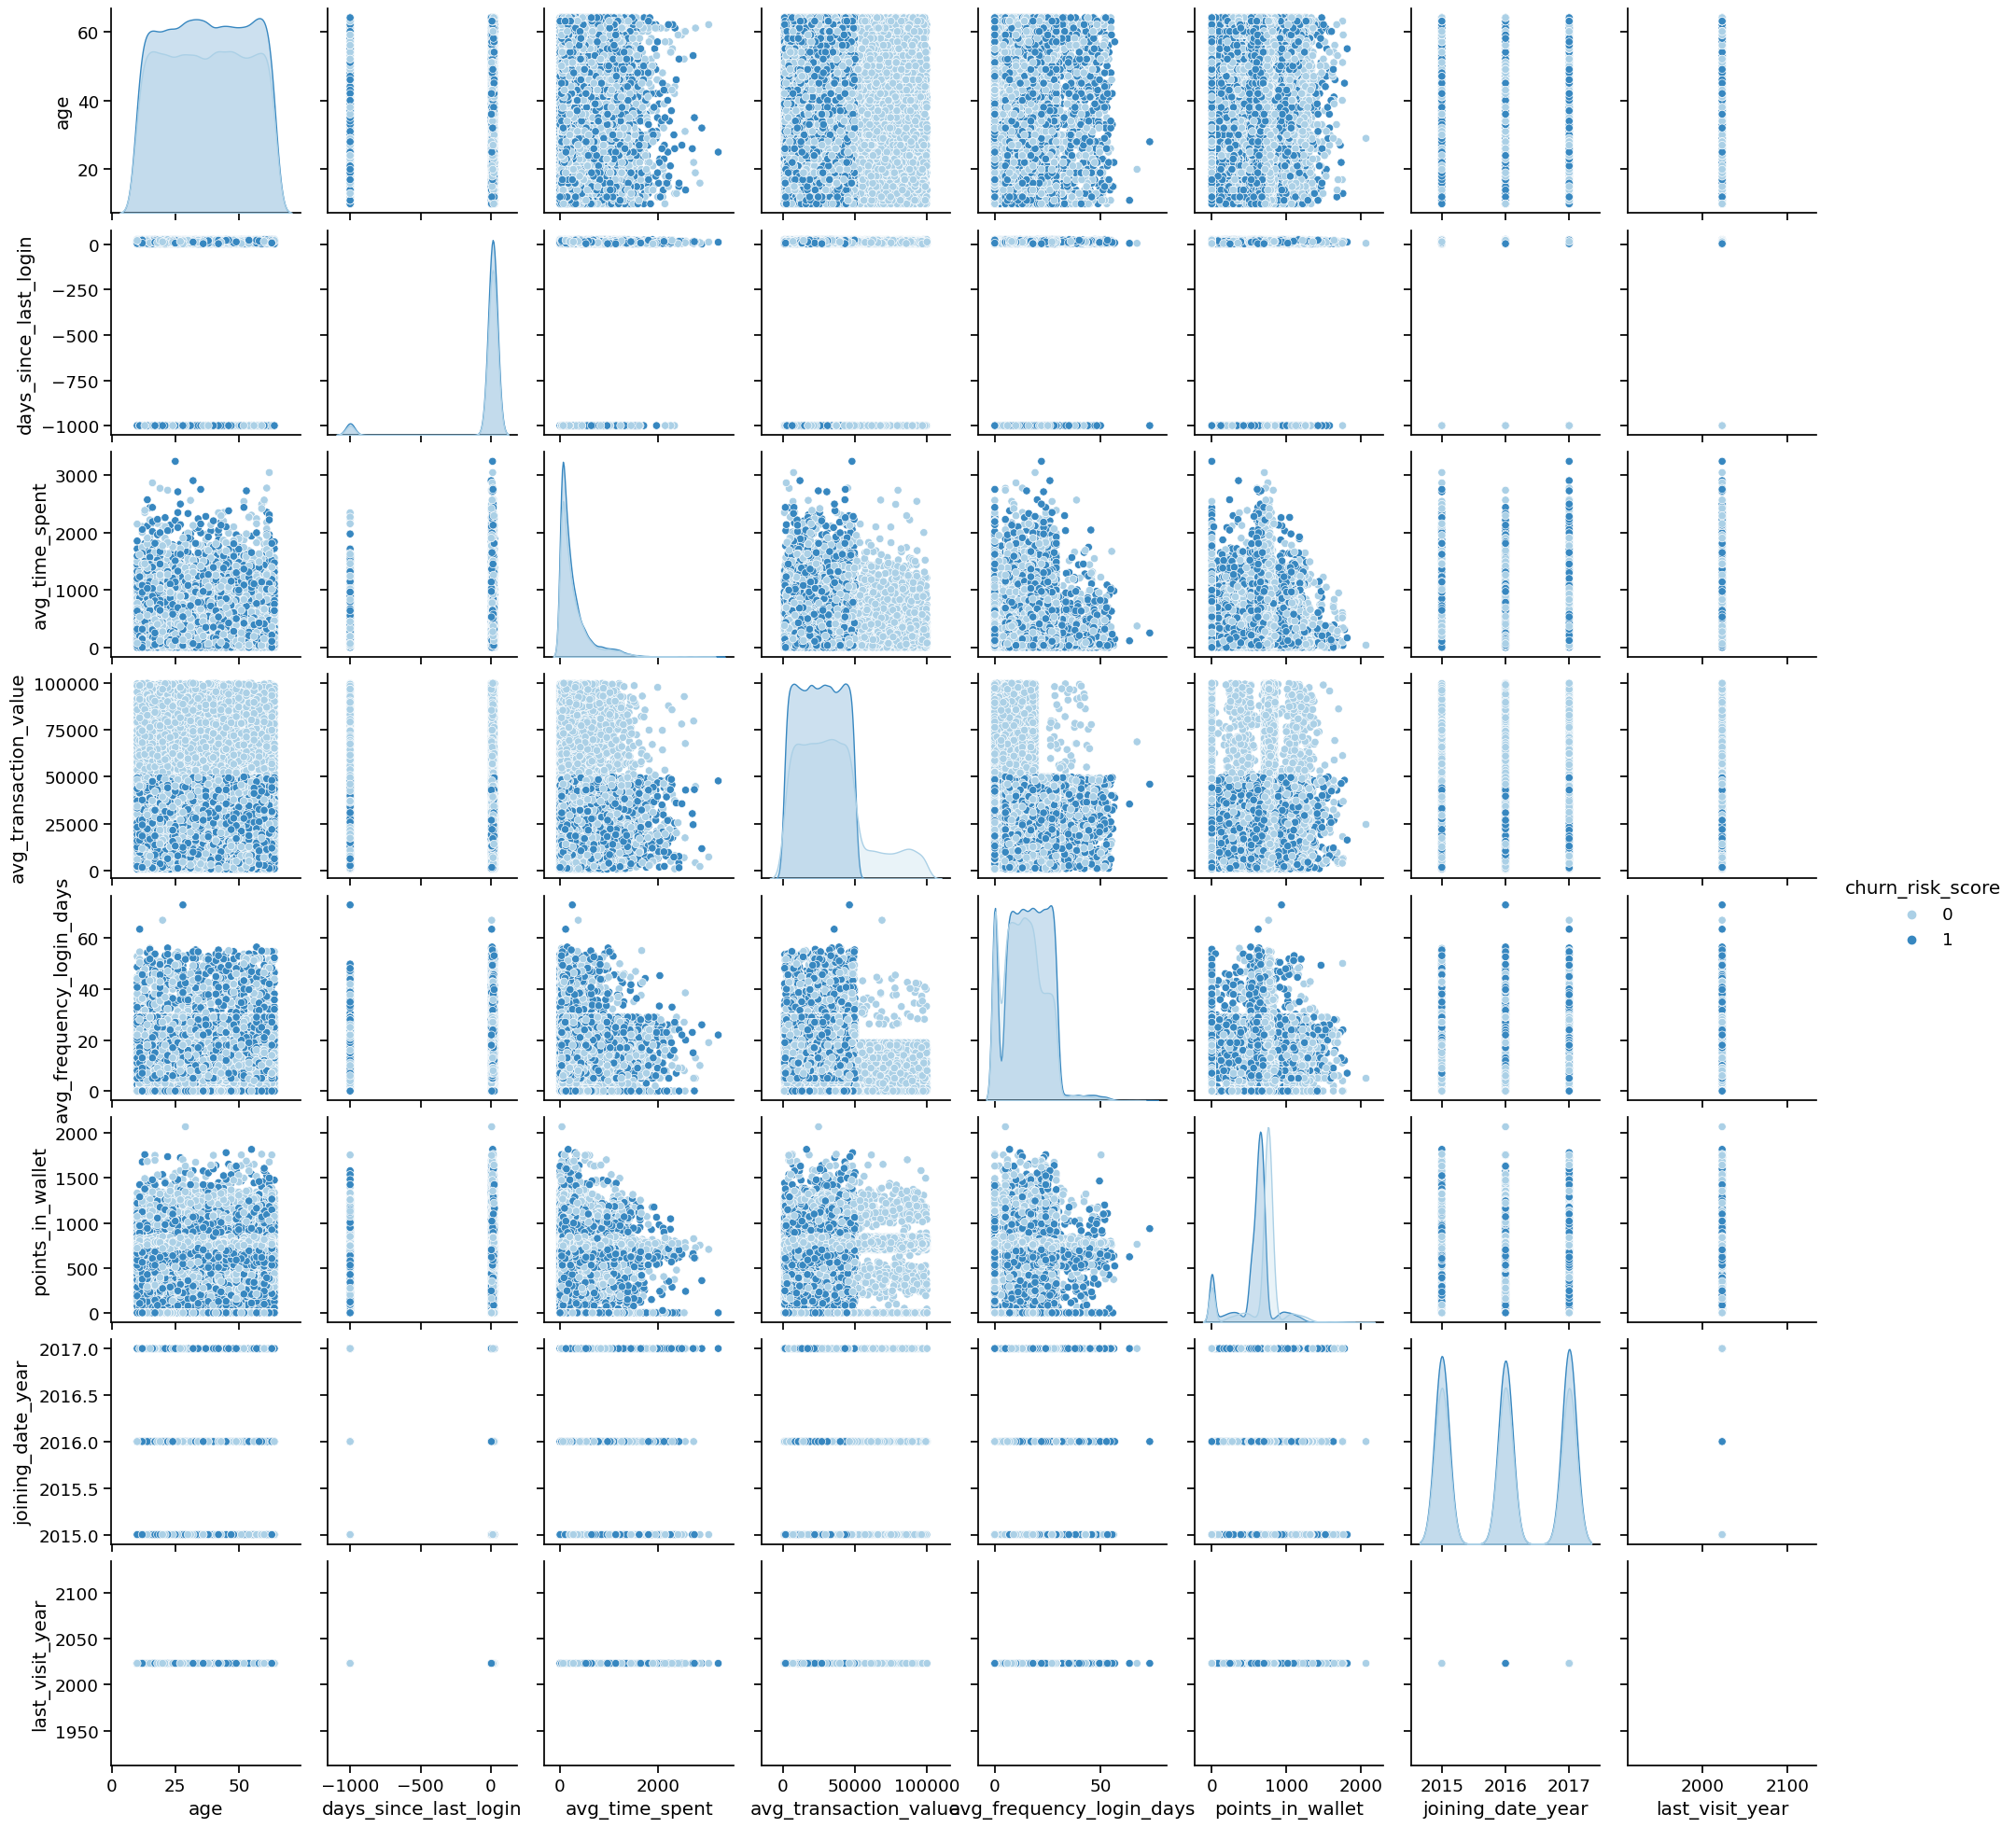

In [26]:
# Menampilkan scatterplot
sns.pairplot(data = data[num_cols], hue = 'churn_risk_score', palette='Blues')

There is no significant correlation of each columns

Statement : 

Based on the available data, out of the 37,010 customers, their ages range from 10 to 64 years, with an average age of 37. They joined between 2015 and 2017, with their last visits recorded in 2023. On average, they log in 14 times per day, spending a total of 279 hours on the website. The longest login duration was 26 days. The risk of customer churn is not correlated with transaction value, but rather with wallet points. Customers with <750 points have a higher churn risk. Churn rates are higher overall, with no gender bias. City and town regions have a higher churn possibility. "No" and "basic" membership categories exhibit higher churn rates. Negative feedback is indicative of churn. Data shows no significant correlations, and distribution appears skewed. Addressing low wallet points, enhancing satisfaction, and managing complaints are vital to reduce churn. Further analysis is needed to understand and rectify any data imbalances

# **V. Feature Engineering**

## Data Cleaning

there is value in days_since_last_login with value is `-999`. The value `-999` is categorized to null category. So i will change the value into null value

In [27]:
# change value <0 in days_since_last_login
data.replace(-999, np.nan, inplace = True)

## Splitting Data Train-set, Val-set, dan Test-set

In [28]:
# Splitting data X & y
X = data.drop(['churn_risk_score', 'joining_date', 'joining_date_year', 'last_visit_time', 'last_visit_year'], axis=1)
y = data['churn_risk_score']

In [29]:
# splitting columns
num_columns = X.select_dtypes(include=np.number).columns.tolist()
cat_columns = X.select_dtypes(include=['object']).columns.tolist()

In [30]:
# splitting categorical columns
cat1_columns = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 
                'internet_option','used_special_discount', 'offer_application_preference', 'past_complaint']

cat2_columns = ['complaint_status', 'feedback']

In [31]:
# Splitting data
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, 
                                                            test_size=0.3, 
                                                            random_state=7, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                  test_size=0.3, random_state=7, stratify=y_train_val)

print('Train size :',X_train.shape)
print('Val size :',X_val.shape)
print('Test size :',X_test.shape)

Train size : (18134, 18)
Val size : (7773, 18)
Test size : (11103, 18)


## Handling Cardinality

On this datasets I will not handling a cardinality

## Pipeline

### Missing Values

In [32]:
# Check missing value
X_train.isnull().sum()

age                                0
gender                            25
region_category                 2666
membership_category                0
joined_through_referral         2684
preferred_offer_types            144
medium_of_operation             2657
internet_option                    0
days_since_last_login            992
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [33]:
# Check missing value
X_val.isnull().sum()

age                                0
gender                            16
region_category                 1154
membership_category                0
joined_through_referral         1136
preferred_offer_types             54
medium_of_operation             1110
internet_option                    0
days_since_last_login            402
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [34]:
# Check missing value
X_test.isnull().sum()

age                                0
gender                            18
region_category                 1611
membership_category                0
joined_through_referral         1622
preferred_offer_types             90
medium_of_operation             1628
internet_option                    0
days_since_last_login            607
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

Based on missing value, the missing value is Missing at Random (MAR)

### Outliers

In [35]:
def diagnostic_plots(df):
    num_cols = len(df.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4*num_rows))
    
    for i, column in enumerate(df.columns):
        row = i // 2
        col = i % 2
        
        ax = axes[row, col]
        sns.boxplot(df[column], ax=ax)
        ax.set_title('Boxplot of ' + column)
        
        skewness = df[column].skew()
        ax.text(0.5, 0.95, f'Skewness: {skewness:.2f}', transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='top',
                bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
    
    plt.tight_layout()
    plt.show()

In [36]:
# reset_index
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

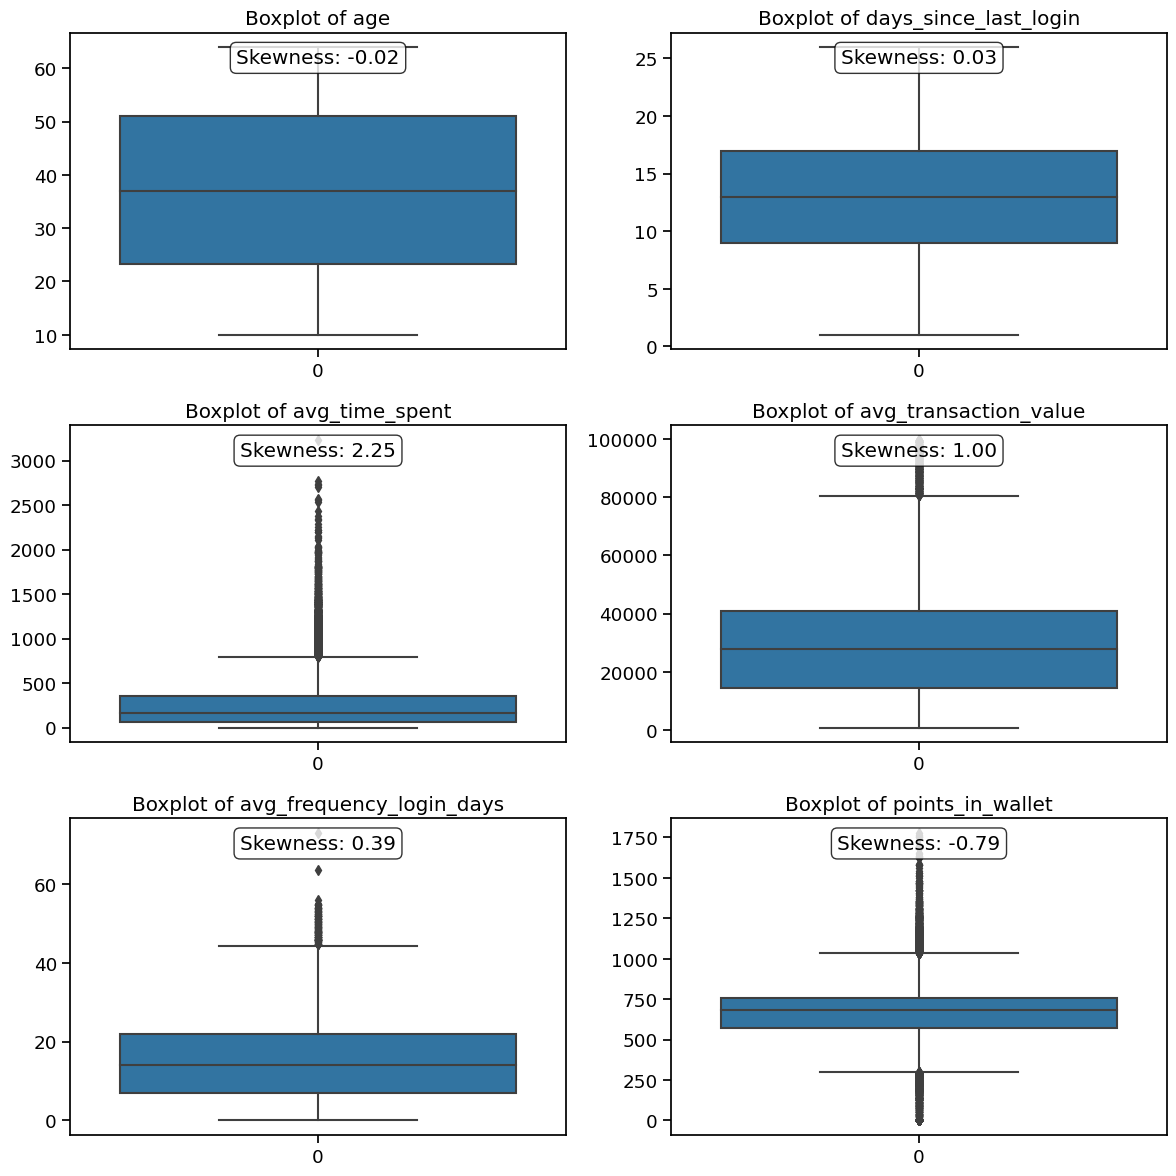

In [37]:
# Menampilkan boxplot
diagnostic_plots(X_train[['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']])

On this datasets each columns who has an outliers distributed skewed, so I will use caping method to handling the outliers

### Building Pipeline

In [38]:
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('outlier', Winsorizer(capping_method='iqr', fold=1.5, tail='both')),
                     ('scaler', MinMaxScaler())])

In [39]:
cat1_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                      ('ord_enc', OrdinalEncoder(categories=[['M', 'F'], ['Village', 'Town', 'City'], 
                                                             ['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Platinum Membership', 
                                                              'Premium Membership'],
                                                             ['No', 'Yes'], ['Without Offers', 'Credit/Debit Card Offers', 'Gift Vouchers/Coupons'],
                                                             ['Smartphone', 'Desktop', 'Both'], ['Mobile_Data', 'Wi-Fi', 'Fiber_Optic'],
                                                             ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes']]))])

In [40]:
cat2_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                      ('ohe_enc', OneHotEncoder(sparse=False))])

In [41]:
# Menggabungkan seluruh pipeline
full_pipeline = ColumnTransformer([('num', num_pipe, num_columns),
                                   ('ord_enc', cat1_pipe, cat1_columns),
                                   ('ohe_enc', cat2_pipe, cat2_columns)])

In [42]:
# Meng-aplikasikan pipeline pada dataset
X_train = full_pipeline.fit_transform(X_train)
X_val = full_pipeline.transform(X_val)
X_test = full_pipeline.transform(X_test)

c:\users\asus1\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
# Membuat dataframe
X_train_final = pd.DataFrame(X_train, columns=num_columns + cat1_columns + ['cs_1', 'cs_2', 'cs_3', 'cs_4', 'cs_5'] + ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9'])
X_val_final = pd.DataFrame(X_val, columns=num_columns + cat1_columns + ['cs_1', 'cs_2', 'cs_3', 'cs_4', 'cs_5'] + ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9'])
X_test_final = pd.DataFrame(X_test, columns=num_columns + cat1_columns + ['cs_1', 'cs_2', 'cs_3', 'cs_4', 'cs_5'] + ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9'])

## Feature Selection

### Checking Correlation

#### Pearson

In [44]:
# Pearson
Xy_train = pd.concat([X_train_final, y_train], axis = 1)
Xy_corr = Xy_train.corr().churn_risk_score.sort_values(ascending = False)

In [45]:
# Menampilkan data korelasi diatas 0
print(Xy_corr[Xy_corr > 0])

churn_risk_score            1.000000
f_9                         0.018046
points_in_wallet            0.017216
internet_option             0.015240
joined_through_referral     0.013010
used_special_discount       0.012404
avg_frequency_login_days    0.012372
cs_3                        0.009083
cs_5                        0.007642
f_2                         0.006677
f_6                         0.006046
age                         0.003391
cs_2                        0.000956
avg_time_spent              0.000517
Name: churn_risk_score, dtype: float64


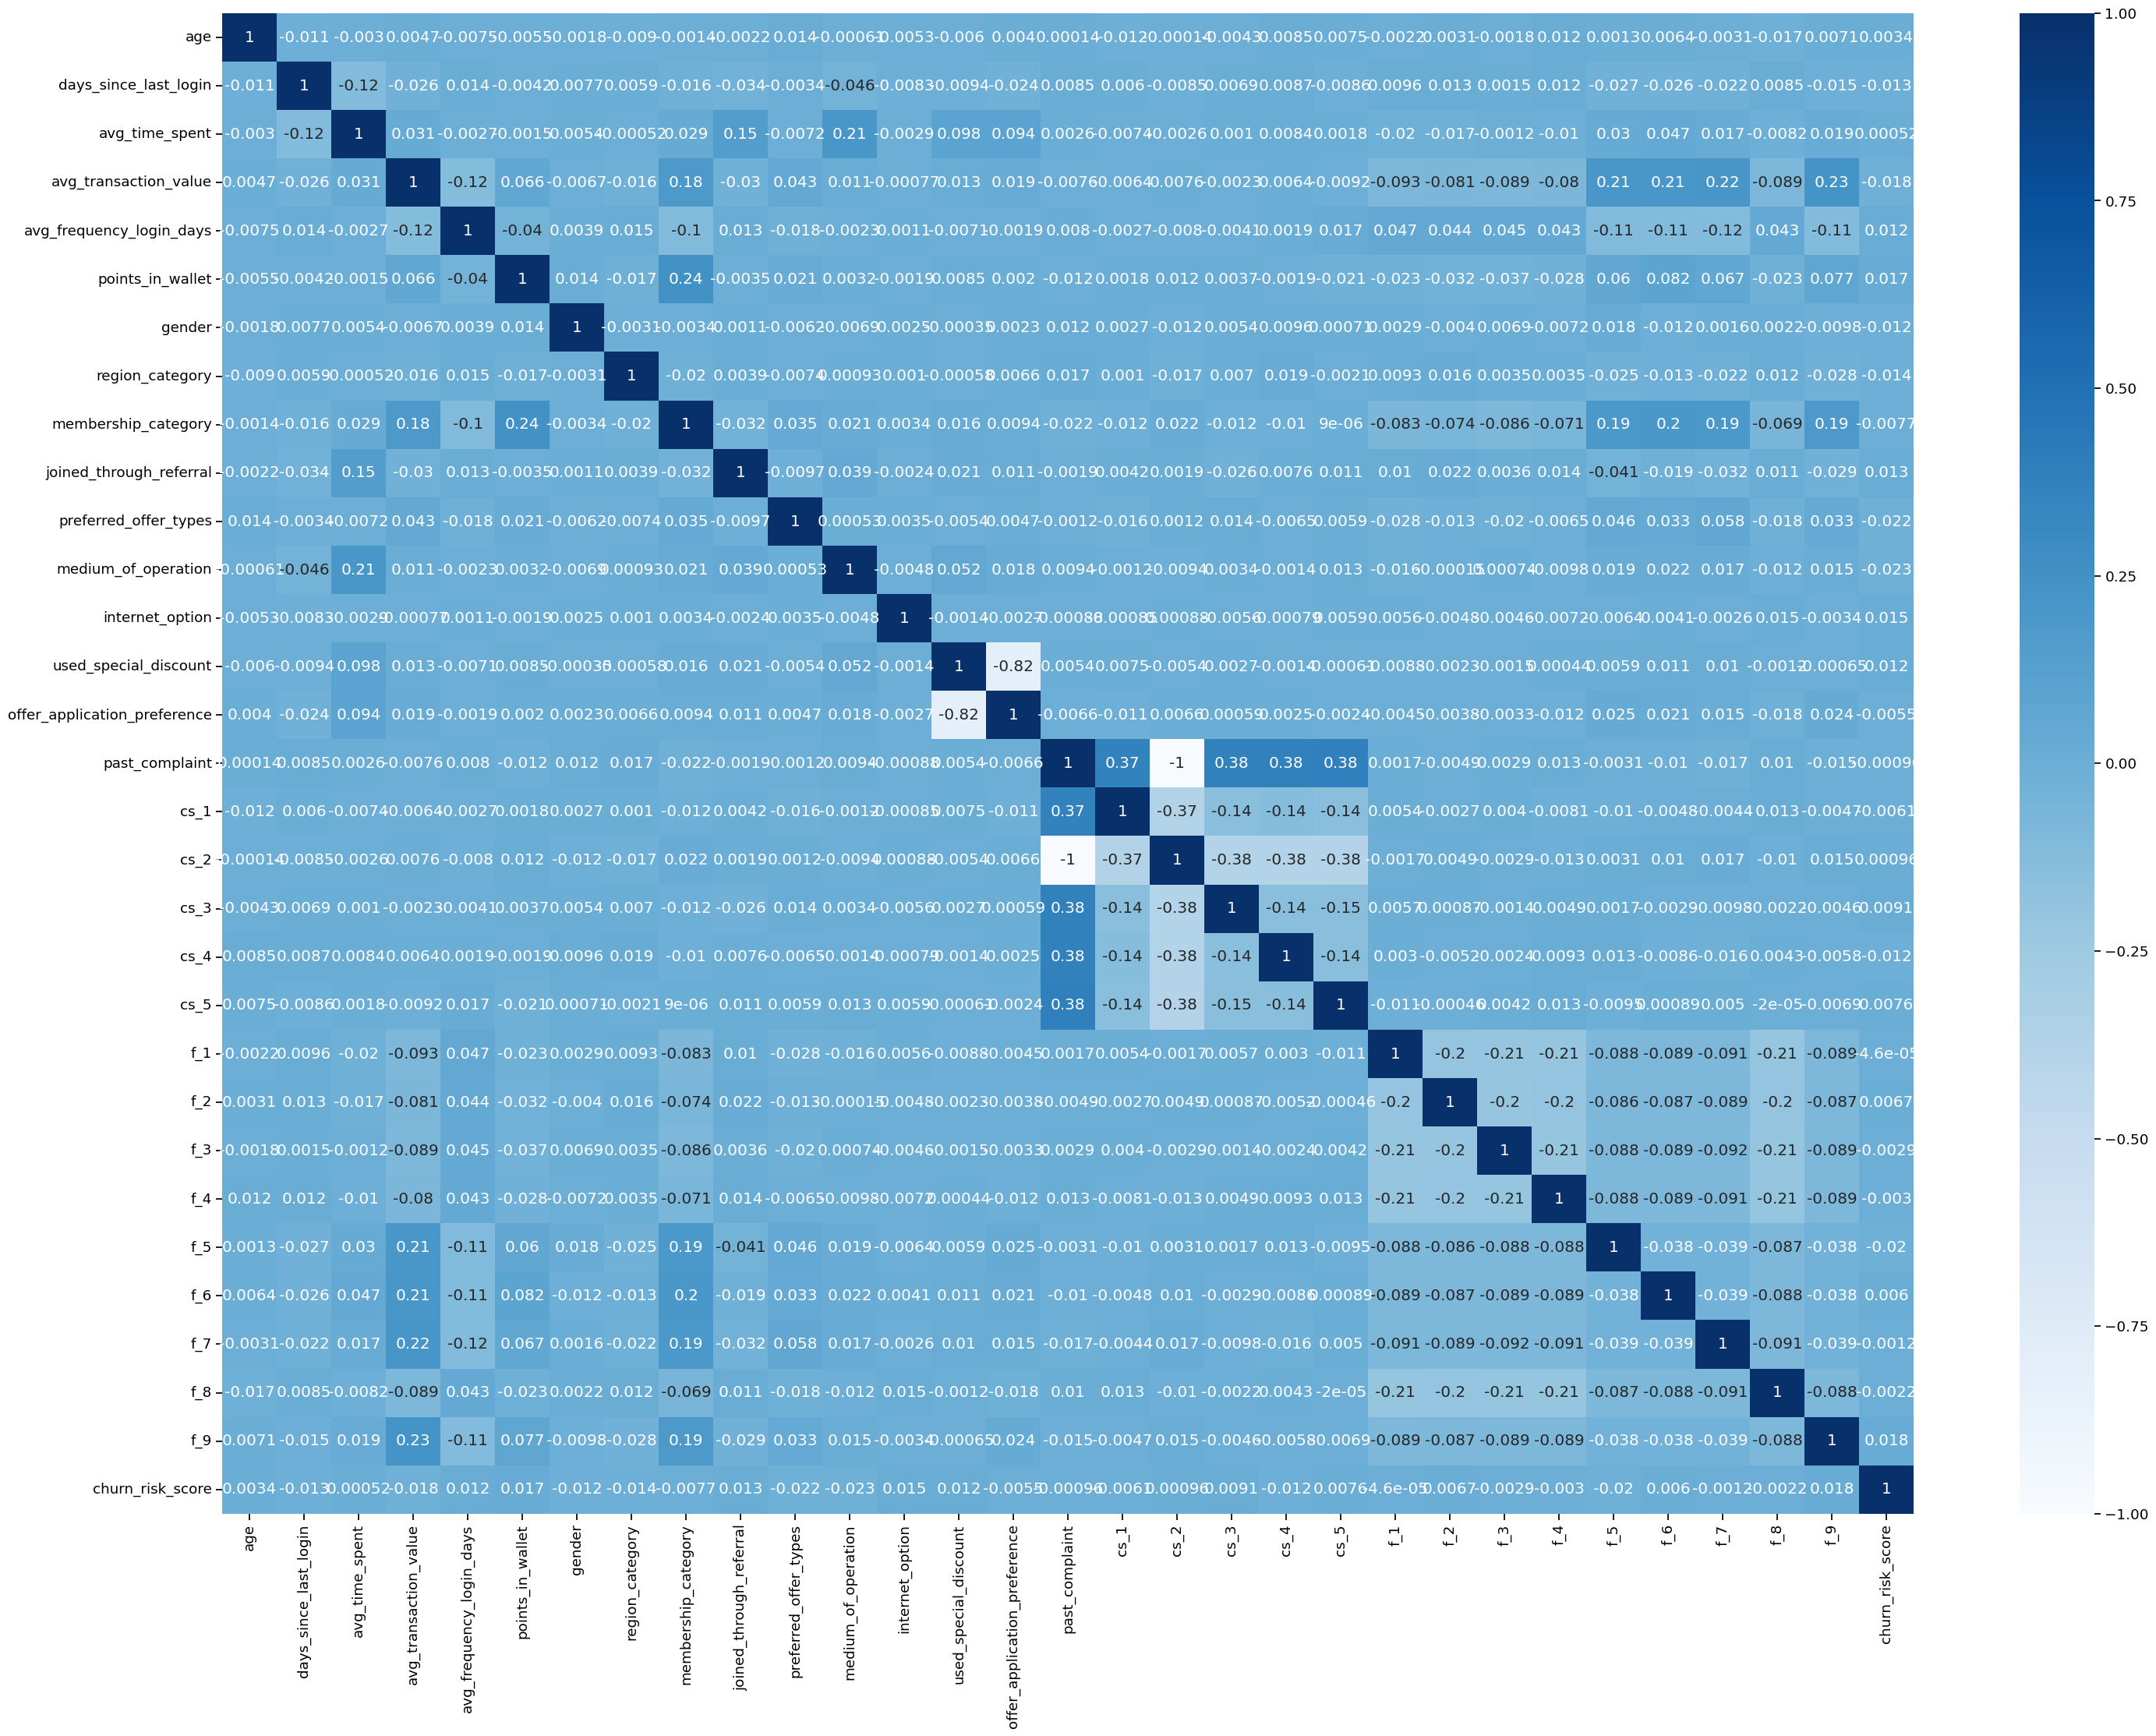

In [46]:
# Menampilkan Grafik Heat Map Korelasi pada Data Numerikal
f, ax = plt.subplots(1,1, figsize=(35,25))
ax = sns.heatmap(Xy_train.corr(), annot = True, cmap = 'Blues')

From the pearsons correlation complaint_status and feedback columns has correlation with each columns

#### Multicollinearity

In [47]:
# Membuat function untuk menghitung nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train_final.columns
    vif["VIF"] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [48]:
# Menampilkan nilai VIF
calc_vif(X_train_final)

c:\users\asus1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variables       VIF
15                past_complaint       inf
16                          cs_1       inf
28                           f_8       inf
27                           f_7       inf
26                           f_6       inf
25                           f_5       inf
24                           f_4       inf
23                           f_3       inf
22                           f_2       inf
21                           f_1       inf
20                          cs_5       inf
19                          cs_4       inf
18                          cs_3       inf
17                          cs_2       inf
29                           f_9       inf
14  offer_application_preference  3.340813
13         used_special_discount  3.340748
3          avg_transaction_value  1.267536
8            membership_category  1.251045
2                 avg_time_spent  1.187228
5               points_in_wallet  1.069056
4       avg_frequency_login_days  1.059642
11           medium_of_operation  1.050882
9        joined_through_referral  1.031610
1          days_since_last_login  1.017094
10         preferred_offer_types  1.009759
7                region_category  1.003359
6                         gender  1.001403
0                            age  1.001275
12               internet_option  1.000661

complaint_status, feedback, and past_complaint columns have not had a multicollinearity

### Chi2 Square

In [49]:
# Seleksi fitur dengan chi-square
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_train_final, y_train)

df_scores = pd.DataFrame({'Feature': X_train_final.columns,
                          'Score': selector.scores_,
                          'p-value': selector.pvalues_.round(4)})

df_scores = df_scores.sort_values(by='Score', ascending=False)

df_scores

Feature         Score  p-value
8            membership_category  13100.508016   0.0000
27                           f_7    827.137297   0.0000
26                           f_6    780.006967   0.0000
29                           f_9    778.828709   0.0000
25                           f_5    768.224384   0.0000
5               points_in_wallet    171.323913   0.0000
23                           f_3    158.091957   0.0000
3          avg_transaction_value    118.014031   0.0000
21                           f_1    111.326647   0.0000
22                           f_2    108.365111   0.0000
24                           f_4     90.129097   0.0000
28                           f_8     85.058905   0.0000
10         preferred_offer_types     32.301594   0.0000
4       avg_frequency_login_days     30.552032   0.0000
9        joined_through_referral      8.060719   0.0045
11           medium_of_operation      5.437377   0.0197
16                          cs_1      3.700912   0.0544
7                region_category      3.504904   0.0612
17                          cs_2      3.498084   0.0614
15                past_complaint      3.492687   0.0616
2                 avg_time_spent      2.849037   0.0914
13         used_special_discount      1.904802   0.1675
14  offer_application_preference      1.609129   0.2046
1          days_since_last_login      0.895574   0.3440
18                          cs_3      0.804354   0.3698
20                          cs_5      0.280927   0.5961
19                          cs_4      0.171504   0.6788
0                            age      0.012207   0.9120
12               internet_option      0.005176   0.9426
6                         gender      0.001321   0.9710


Based on chi2 square membership_category, feedback, preferred_offer_types, joined_through_referral, and medium_of_operation have a correlation

# **VI. Model Definition**

## Tensorflow Pipeline

In [50]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(473).prefetch(tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(473)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(473)

## Sequential API

In the sequential API, we used 2 hidden layers with dense (8 and 4), activation `relu`, and initializers `HeNormal` as a default hidden layers

In output layer we use activation `sigmoid` (binary prediction), and initializer `GlorotNormal`

For metrics we use `loss`, `accuracy`, `precision`, and `recall`

In compile we use `RMSprop` for default optimizer in sequential API

In [51]:
seed = 7 # like random_state
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [52]:
# Model definition
seq_mod1 = Sequential()

# Hidden Layer 1
seq_mod1.add(Dense(8,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed),
                       input_shape=(30, ))) # Input Num of Features
# Hidden Layer 2
seq_mod1.add(Dense(4,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed)))

# Output layer
seq_mod1.add(Dense(1,
                       activation='sigmoid',
                       kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Define Metric
acc = tf.keras.metrics.BinaryAccuracy()
prc = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()

# Compile
seq_mod1.compile(loss='binary_crossentropy',
                     optimizer='RMSprop',
                     metrics=[acc, prc, rec])

seq_mod1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 248       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


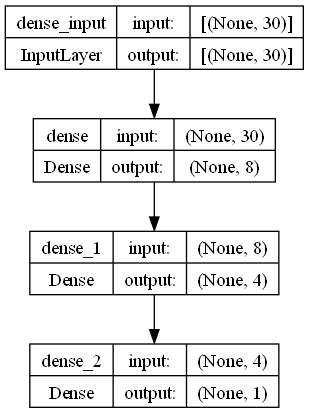

In [53]:
# Plot Layers
tf.keras.utils.plot_model(seq_mod1, show_shapes=True)

## Sequential API Improved

In the sequential API improved, we used 2 hidden layers with dense (8 and 4), activation `relu`, and initializers `HeNormal` as a default hidden layers, and add `dropout` for optimize the model, also add `BatchNormalization` to optimize gap between data

In output layer we use activation `sigmoid` (binary prediction), and initializer `GlorotNormal`

For metrics we use `loss`, `accuracy`, `precision`, and `recall`

In compile we use `Nadam` for default optimizer in sequential API improved

In [54]:
# Model definition
seq_mod2 = Sequential()

# Hidden Layer 1
seq_mod2.add(Dense(8,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed),
                       input_shape=(30, ))) # Input Num of Features
seq_mod2.add(tf.keras.layers.Dropout(rate=0.1)) # Add dropout to optimize model
seq_mod2.add(tf.keras.layers.BatchNormalization()) # add BatchNormalization to optimize gap between data
# Hidden Layer 2
seq_mod2.add(Dense(4,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed)))
seq_mod2.add(tf.keras.layers.Dropout(rate=0.1)) # Add dropout to optimize model
seq_mod2.add(tf.keras.layers.BatchNormalization()) # add Batch Normalization to optimize gap between data
# Output Layer
seq_mod2.add(Dense(1,
                       activation='sigmoid',
                       kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Define Metric
acc = tf.keras.metrics.BinaryAccuracy()
prc = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()

# Compile
seq_mod2.compile(loss='binary_crossentropy',
                     optimizer='Nadam',
                     metrics=[acc, prc, rec])

seq_mod2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 248       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 batch_normalization_1 (Batc  (None, 4)                16        
 hNormalization)                                      

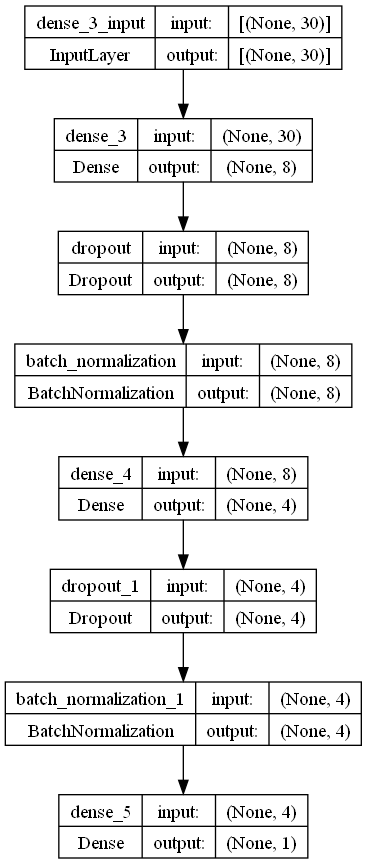

In [55]:
# Plot layer
tf.keras.utils.plot_model(seq_mod2, show_shapes=True)

## Functional API

In the functional API, we used 3 hidden layers with dense (8, 4, and 2), activation `relu`, and initializers `HeNormal` as a default hidden layers

In output layer we use activation `sigmoid` (binary prediction), and initializer `GlorotNormal`

For metrics we use `loss`, `accuracy`, `precision`, and `recall`

In compile we use `RMSprop` for default optimizer in functional API

In [56]:
# Input Layer
input_layer = Input(shape=(30,)) # Input/Feature

# Hidden Layer
hidden_layer_1 = Dense(8,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(4,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)
hidden_layer_3 = Dense(2,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_2)
# Concat Layer
concat_layer = concatenate([input_layer, hidden_layer_3])

# Output Layer
output_layer = Dense(1, activation='sigmoid', 
                     kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

# Define Model
func_mod1 = Model(inputs=input_layer, outputs=output_layer)

# Define Metric
acc = tf.keras.metrics.BinaryAccuracy()
prc = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()

# Compile
func_mod1.compile(loss='binary_crossentropy',
                         optimizer='RMSprop',
                         metrics=[acc, prc, rec])
func_mod1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 8)            248         ['input_1[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 4)            36          ['dense_6[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 2)            10          ['dense_7[0][0]']                
                                                                                              

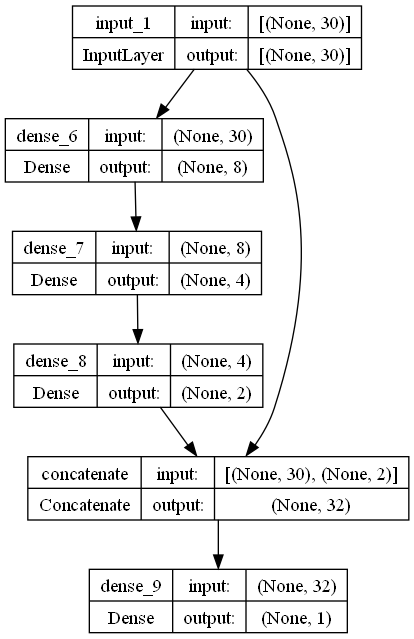

In [57]:
# Plot layer
tf.keras.utils.plot_model(func_mod1, show_shapes=True)

## Functional API Improved

In the functional API improve, we used 2 hidden layers with dense (8 and 4), activation `relu`, and initializers `HeNormal` as a default hidden layers, add `dropout` to optimize model, also add `BatchNormalization` to optimize gap between data

In output layer we use activation `sigmoid` (binary prediction), and initializer `GlorotNormal`

For metrics we use `loss`, `accuracy`, `precision`, and `recall`

In compile we use `Nadam` for default optimizer in functional API Improved

In [58]:
# Input Layer
input_layer = Input(shape=(30,)) # Input/Feature

# Hidden Layer
hidden_layer_1 = Dense(8,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
dropout1 = Dropout(rate=0.1)(hidden_layer_1) # Add dropout to optimize model
batchnorma1 = BatchNormalization()(dropout1) # add BatchNormalization to optimize gap between data
hidden_layer_2 = Dense(4,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(batchnorma1)
dropout2 =Dropout(rate=0.1)(hidden_layer_2) # Add dropout to optimize model
batchnorma2 = BatchNormalization()(dropout2) # add BatchNormalization to optimize gap between data
# Concat Layer
concat_layer = concatenate([input_layer, batchnorma2])

# Output Layer
output_layer = Dense(1, activation='sigmoid', 
                     kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

# Define Model
func_mod2 = Model(inputs=input_layer, outputs=output_layer)

# Define Metric
acc = tf.keras.metrics.BinaryAccuracy()
prc = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()

# Compile
func_mod2.compile(loss='binary_crossentropy',
                         optimizer='Nadam',
                         metrics=[acc, prc, rec])
func_mod2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 8)            248         ['input_2[0][0]']                
                                                                                                  
 dropout_2 (Dropout)            (None, 8)            0           ['dense_10[0][0]']               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 8)           32          ['dropout_2[0][0]']              
 rmalization)                                                                               

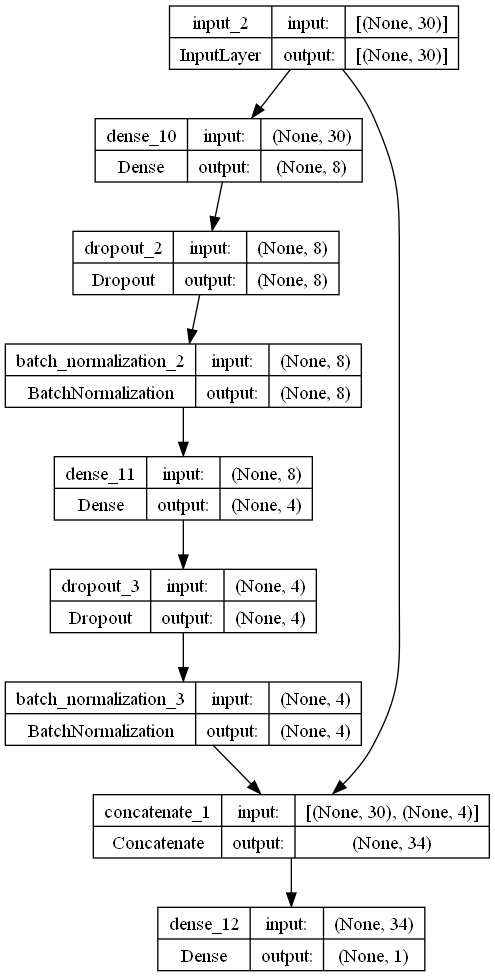

In [59]:
# Plot layer
tf.keras.utils.plot_model(func_mod2, show_shapes=True)

# **VII. Model Training**

## Callback Tensorflow

We use `early stopping` callback to take a good value from epoch

In [60]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

## Sequential API

In [61]:
# Training Model
%time

history_seq1 = seq_mod1.fit(train_pipe, epochs=200, validation_data=(val_pipe), callbacks=es_callback)

CPU times: total: 0 ns
Wall time: 0 ns


Epoch 1/200
39/39 [==============================] - 1s 8ms/step - loss: 0.7037 - binary_accuracy: 0.4127 - precision: 0.4507 - recall: 0.3919 - val_loss: 0.6963 - val_binary_accuracy: 0.4634 - val_precision: 0.5029 - val_recall: 0.6755
Epoch 2/200
39/39 [==============================] - 0s 3ms/step - loss: 0.6922 - binary_accuracy: 0.5303 - precision: 0.5451 - recall: 0.7962 - val_loss: 0.6889 - val_binary_accuracy: 0.5857 - val_precision: 0.5808 - val_recall: 0.8411
Epoch 3/200
39/39 [==============================] - 0s 3ms/step - loss: 0.6811 - binary_accuracy: 0.6726 - precision: 0.6666 - recall: 0.7896 - val_loss: 0.6734 - val_binary_accuracy: 0.7316 - val_precision: 0.7518 - val_recall: 0.7521
Epoch 4/200
39/39 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.7851 - precision: 0.8233 - recall: 0.7674 - val_loss: 0.6528 - val_binary_accuracy: 0.8061 - val_precision: 0.8704 - val_recall: 0.7538
Epoch 5/200
39/39 [==============================] -

## Sequential API Improved

In [62]:
# Training Model
%time

history_seq2 = seq_mod2.fit(train_pipe, epochs=200, validation_data=(val_pipe), callbacks=es_callback)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/200


39/39 [==============================] - 2s 9ms/step - loss: 1.2828 - binary_accuracy: 0.4131 - precision_1: 0.4671 - recall_1: 0.6027 - val_loss: 0.7033 - val_binary_accuracy: 0.5122 - val_precision_1: 0.5281 - val_recall_1: 0.9225
Epoch 2/200
39/39 [==============================] - 0s 3ms/step - loss: 1.0452 - binary_accuracy: 0.4711 - precision_1: 0.5083 - recall_1: 0.6846 - val_loss: 0.6983 - val_binary_accuracy: 0.5412 - val_precision_1: 0.5420 - val_recall_1: 0.9795
Epoch 3/200
39/39 [==============================] - 0s 4ms/step - loss: 0.8873 - binary_accuracy: 0.5313 - precision_1: 0.5492 - recall_1: 0.7453 - val_loss: 0.6885 - val_binary_accuracy: 0.5648 - val_precision_1: 0.5559 - val_recall_1: 0.9715
Epoch 4/200
39/39 [==============================] - 0s 4ms/step - loss: 0.7706 - binary_accuracy: 0.5881 - precision_1: 0.5919 - recall_1: 0.7686 - val_loss: 0.6286 - val_binary_accuracy: 0.6671 - val_precision_1: 0.6660 - val_recall_1: 0.7712
Epoch 5/200
39/39 [=============

## Functional API

In [63]:
# Training Model
%time

history_func1 = func_mod1.fit(train_pipe, epochs=200, validation_data=(val_pipe), callbacks=es_callback)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/200


39/39 [==============================] - 1s 7ms/step - loss: 0.7782 - binary_accuracy: 0.4890 - precision_2: 0.5810 - recall_2: 0.1981 - val_loss: 0.7230 - val_binary_accuracy: 0.5231 - val_precision_2: 0.6221 - val_recall_2: 0.3011
Epoch 2/200
39/39 [==============================] - 0s 3ms/step - loss: 0.7065 - binary_accuracy: 0.5436 - precision_2: 0.6227 - recall_2: 0.3964 - val_loss: 0.6684 - val_binary_accuracy: 0.5899 - val_precision_2: 0.6535 - val_recall_2: 0.5145
Epoch 3/200
39/39 [==============================] - 0s 3ms/step - loss: 0.6598 - binary_accuracy: 0.6019 - precision_2: 0.6502 - recall_2: 0.5713 - val_loss: 0.6298 - val_binary_accuracy: 0.6438 - val_precision_2: 0.6744 - val_recall_2: 0.6598
Epoch 4/200
39/39 [==============================] - 0s 2ms/step - loss: 0.6235 - binary_accuracy: 0.6569 - precision_2: 0.6828 - recall_2: 0.6830 - val_loss: 0.5976 - val_binary_accuracy: 0.6973 - val_precision_2: 0.7101 - val_recall_2: 0.7441
Epoch 5/200
39/39 [=============

## Functional API Improved

In [64]:
# Training Model
%time

history_func2 = func_mod2.fit(train_pipe, epochs=200, validation_data=(val_pipe), callbacks=es_callback)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/200


39/39 [==============================] - 2s 8ms/step - loss: 0.7834 - binary_accuracy: 0.4918 - precision_3: 0.6054 - recall_3: 0.1736 - val_loss: 0.7439 - val_binary_accuracy: 0.5025 - val_precision_3: 0.6067 - val_recall_3: 0.2279
Epoch 2/200
39/39 [==============================] - 0s 3ms/step - loss: 0.6771 - binary_accuracy: 0.5845 - precision_3: 0.7035 - recall_3: 0.4010 - val_loss: 0.6573 - val_binary_accuracy: 0.6035 - val_precision_3: 0.6964 - val_recall_3: 0.4731
Epoch 3/200
39/39 [==============================] - 0s 3ms/step - loss: 0.5946 - binary_accuracy: 0.6964 - precision_3: 0.7769 - recall_3: 0.6155 - val_loss: 0.5692 - val_binary_accuracy: 0.7361 - val_precision_3: 0.7754 - val_recall_3: 0.7210
Epoch 4/200
39/39 [==============================] - 0s 3ms/step - loss: 0.5233 - binary_accuracy: 0.7708 - precision_3: 0.8197 - recall_3: 0.7388 - val_loss: 0.4920 - val_binary_accuracy: 0.8082 - val_precision_3: 0.8205 - val_recall_3: 0.8261
Epoch 5/200
39/39 [=============

# **VIII. Model Evaluation**

## Sequential API

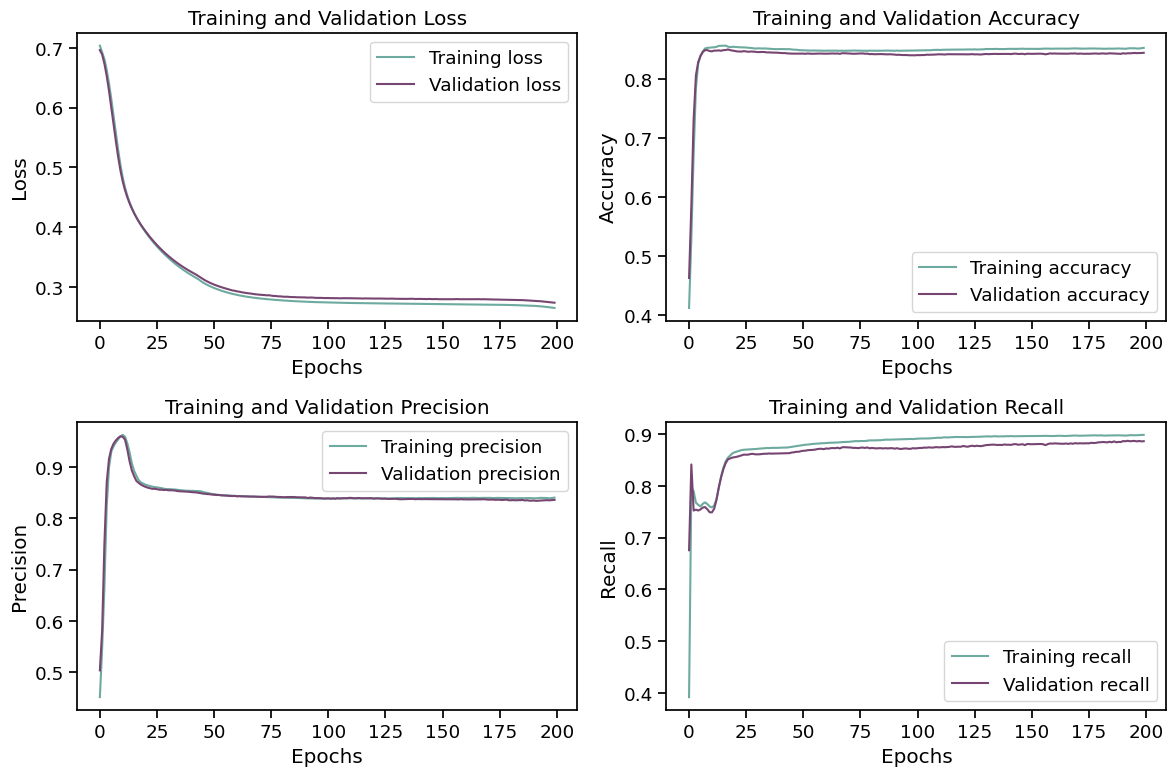

In [65]:
seq_mod1_df = pd.DataFrame(history_seq1.history)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Training and Validation Loss
axs[0, 0].plot(seq_mod1_df['loss'], "#6daa9f", label='Training loss')
axs[0, 0].plot(seq_mod1_df['val_loss'], "#774571", label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(seq_mod1_df['binary_accuracy'], "#6daa9f", label='Training accuracy')
axs[0, 1].plot(seq_mod1_df['val_binary_accuracy'], "#774571", label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(seq_mod1_df['precision'], "#6daa9f", label='Training precision')
axs[1, 0].plot(seq_mod1_df['val_precision'], "#774571", label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(seq_mod1_df['recall'], "#6daa9f", label='Training recall')
axs[1, 1].plot(seq_mod1_df['val_recall'], "#774571", label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


24/24 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      5098
           1       0.85      0.89      0.86      6005

    accuracy                           0.85     11103
   macro avg       0.85      0.85      0.85     11103
weighted avg       0.85      0.85      0.85     11103



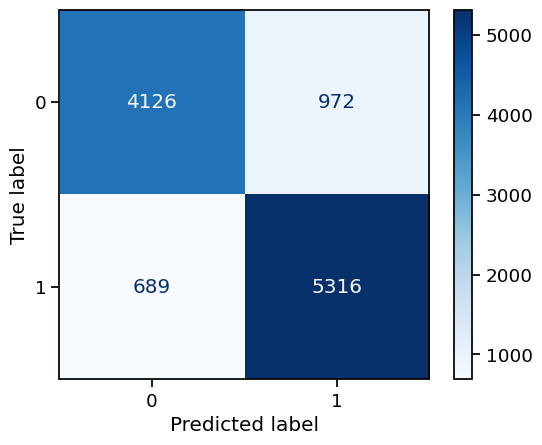

In [66]:
# Evaluasi model  of test set

y_pred_seq1 = seq_mod1.predict(test_pipe)
y_pred_seq1 = np.where(y_pred_seq1 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq1))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_seq1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Blues')
plt.show()

## Sequential API Improved

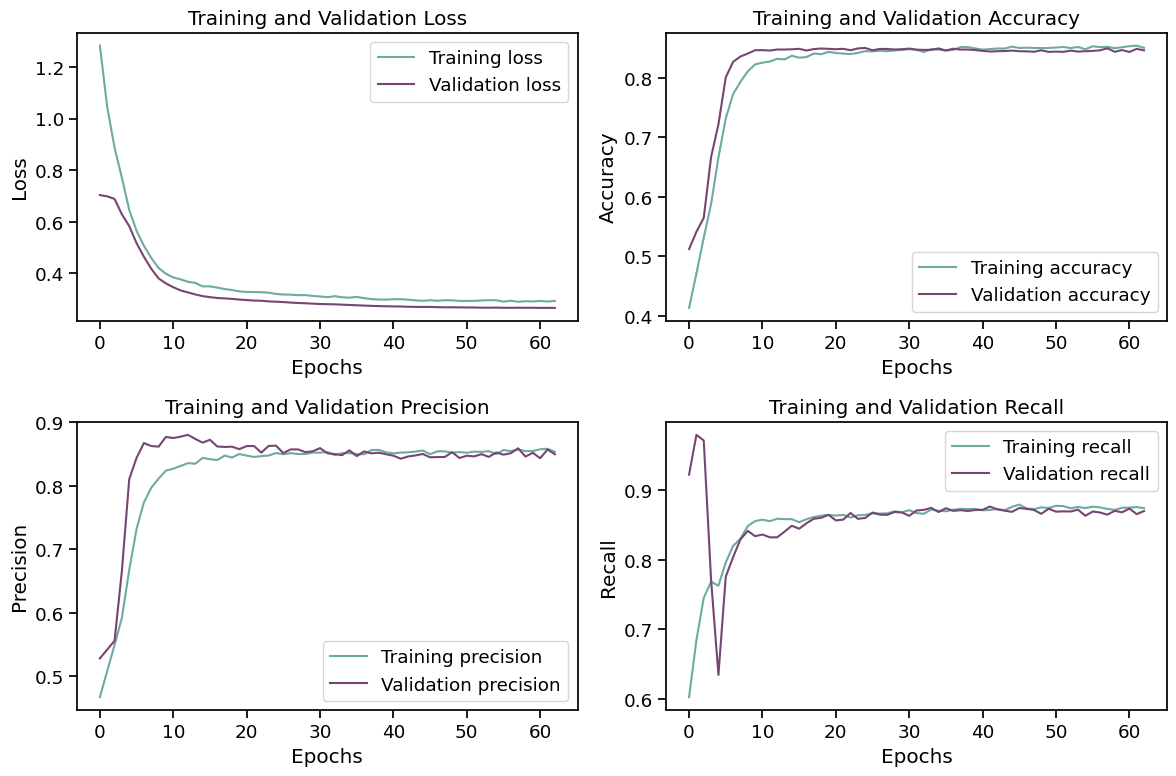

In [67]:
seq_mod2_df = pd.DataFrame(history_seq2.history)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Training and Validation Loss
axs[0, 0].plot(seq_mod2_df['loss'], "#6daa9f", label='Training loss')
axs[0, 0].plot(seq_mod2_df['val_loss'], "#774571", label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(seq_mod2_df['binary_accuracy'], "#6daa9f", label='Training accuracy')
axs[0, 1].plot(seq_mod2_df['val_binary_accuracy'], "#774571", label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(seq_mod2_df['precision_1'], "#6daa9f", label='Training precision')
axs[1, 0].plot(seq_mod2_df['val_precision_1'], "#774571", label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(seq_mod2_df['recall_1'], "#6daa9f", label='Training recall')
axs[1, 1].plot(seq_mod2_df['val_recall_1'], "#774571", label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5098
           1       0.87      0.86      0.87      6005

    accuracy                           0.86     11103
   macro avg       0.85      0.86      0.85     11103
weighted avg       0.86      0.86      0.86     11103



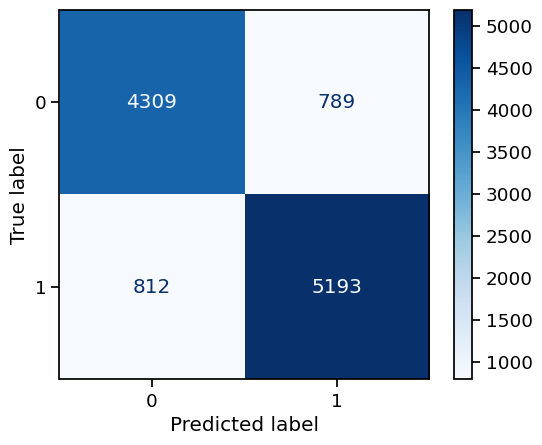

In [68]:
# Evaluasi model  of test set

y_pred_seq2 = seq_mod2.predict(test_pipe)
y_pred_seq2 = np.where(y_pred_seq2 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq2))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_seq2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Blues')
plt.show()

Statement :

Sequential API

 - From the model, we've known that in epoch 40 get a linear balance (loss)

 - loss score convergence at epoch 25 and showing stable performance

 - Accuracy, Recall, Precision score convergence at epoch 25 and showing stable performance

 - We focused on the Recall score from the classification report and got 89% 


Sequential API Improved

 - From the model, we've known that in epoch 10 get a linear balance (loss)

 - loss score convergence at epoch 5 and showing stable performance

 - Accuracy, Recall, Precision score convergence at epoch 5 and showing stable performance

 - we focused on the Recall score from the classification report 86%

## Functional API

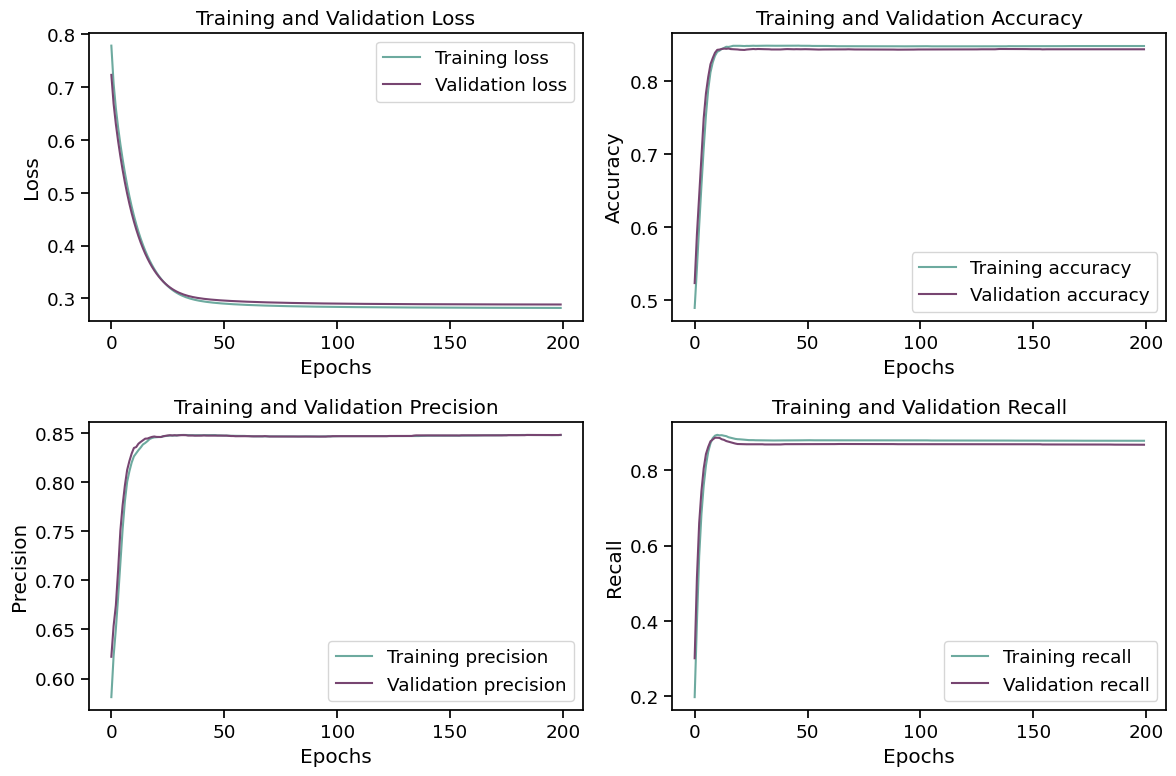

In [69]:
func_mod1_df = pd.DataFrame(history_func1.history)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Training and Validation Loss
axs[0, 0].plot(func_mod1_df['loss'], "#6daa9f", label='Training loss')
axs[0, 0].plot(func_mod1_df['val_loss'], "#774571", label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(func_mod1_df['binary_accuracy'], "#6daa9f", label='Training accuracy')
axs[0, 1].plot(func_mod1_df['val_binary_accuracy'], "#774571", label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(func_mod1_df['precision_2'], "#6daa9f", label='Training precision')
axs[1, 0].plot(func_mod1_df['val_precision_2'], "#774571", label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(func_mod1_df['recall_2'], "#6daa9f", label='Training recall')
axs[1, 1].plot(func_mod1_df['val_recall_2'], "#774571", label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


24/24 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5098
           1       0.85      0.87      0.86      6005

    accuracy                           0.85     11103
   macro avg       0.85      0.84      0.84     11103
weighted avg       0.85      0.85      0.85     11103



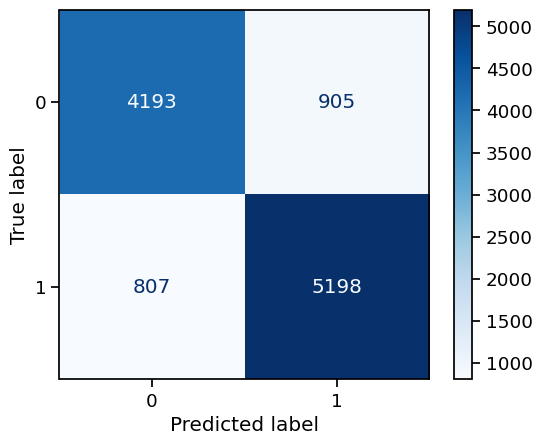

In [70]:
# Evaluasi model  of test set

y_pred_func1 = func_mod1.predict(test_pipe)
y_pred_func1 = np.where(y_pred_func1 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func1))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_func1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Blues')
plt.show()

## Functional API Improved

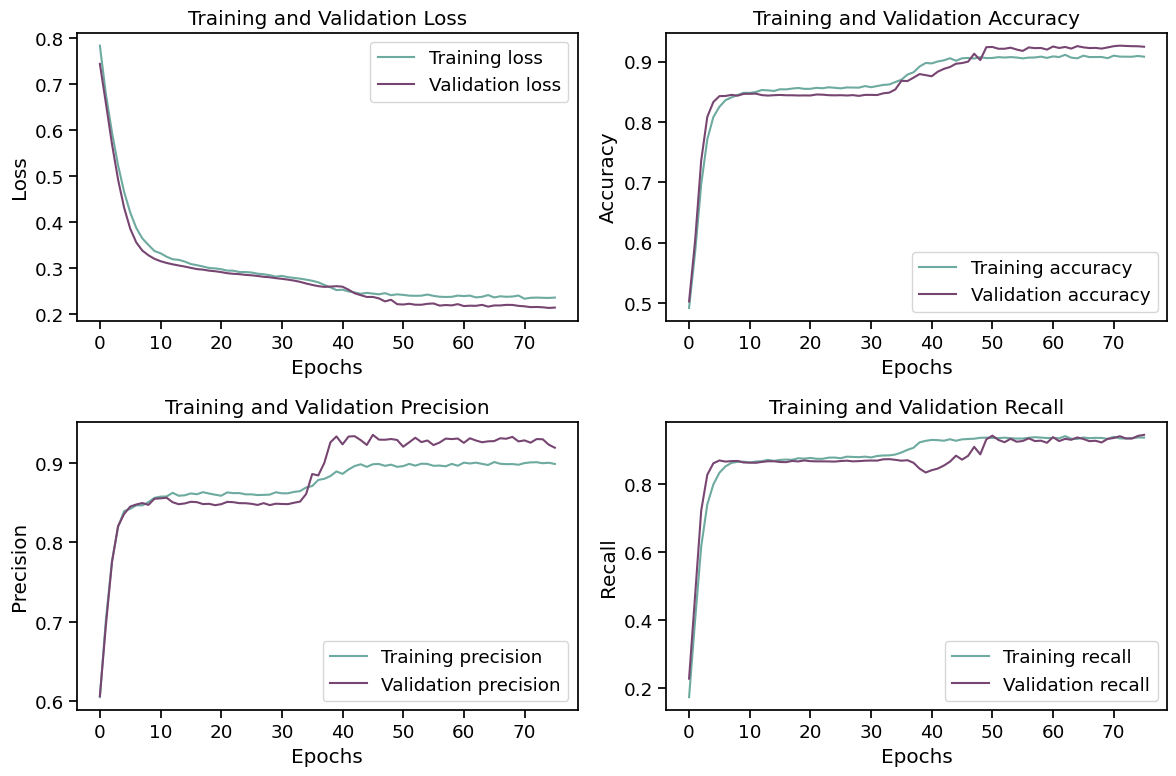

In [71]:
func_mod2_df = pd.DataFrame(history_func2.history)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Training and Validation Loss
axs[0, 0].plot(func_mod2_df['loss'], "#6daa9f", label='Training loss')
axs[0, 0].plot(func_mod2_df['val_loss'], "#774571", label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(func_mod2_df['binary_accuracy'], "#6daa9f", label='Training accuracy')
axs[0, 1].plot(func_mod2_df['val_binary_accuracy'], "#774571", label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(func_mod2_df['precision_3'], "#6daa9f", label='Training precision')
axs[1, 0].plot(func_mod2_df['val_precision_3'], "#774571", label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(func_mod2_df['recall_3'], "#6daa9f", label='Training recall')
axs[1, 1].plot(func_mod2_df['val_recall_3'], "#774571", label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


24/24 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5098
           1       0.93      0.93      0.93      6005

    accuracy                           0.93     11103
   macro avg       0.93      0.93      0.93     11103
weighted avg       0.93      0.93      0.93     11103



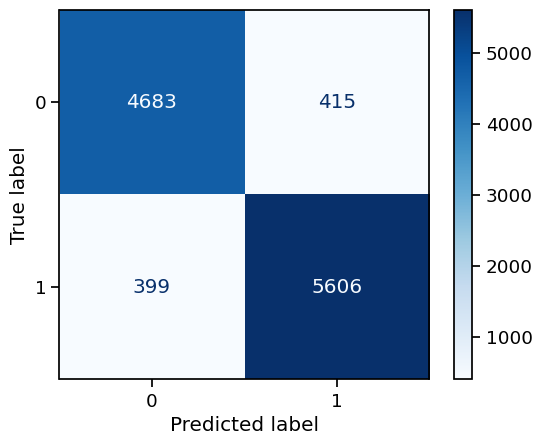

In [72]:
# Evaluasi model  of test set

y_pred_func2 = func_mod2.predict(test_pipe)
y_pred_func2 = np.where(y_pred_func2 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func2))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_func2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Blues')
plt.show()

Statement :

Functional API

 - From the model, we've known that in epoch 25 get a linear balance (loss)

 - loss score convergence at epoch 15 and showing stable performance

 - Accuracy, Recall, Precision score convergence at epoch 5 and showing stable performance

 - We focused on the Recall score from the classification report and got 87% 


Functional API Improved

 - From the model, we've known that in epoch 20 get a linear balance (loss)

 - loss score convergence at epoch 10 and showing stable performance

 - Accuracy, Recall, Precision score convergence at epoch 10 and showing stable performance

 - we focused on the Recall score from the classification report 93%

Conclusion :

- The Functional API Improved have a greater score and model, so I decided to use this model as my final model

# **IX. Model Saving**

In [73]:
# Save model
with open('full_pipeline.pkl', 'wb') as file_1:
  pickle.dump(full_pipeline, file_1)

# Save ANN Model
func_mod2.save('model.h5')

# **XI. Conclusion**

Exploratory Data Analysis : 

- From 37010 customers The age of the customer distribute from 10 - 64 years old with a mean of 37 years old. The customer joining date is in 2015 - 2017 and the last visit is in 2023, the customer will log in 14 times a day and will spend 279 hours on the website. The longest last days of customer login is 26 days.

- From the average transaction value, of more than 50000 transactions the risk of the customer will churn is no, opposite that the risk of the customer will churn is the possibility to churn. The customer with < 750 points in the wallet risks churn than  points in the wallet > 750

- The customer churn is higher than the customer does not churn, both genders are equal, by region of city and town has a high possibility to churn, by membership category `no` and `basic` membership are high churn, and by the feedback, the customer who gives bad feedback is the high churn

- There is no significant correlation of each columns and the distribution of data are skewed

Model Analysis :

- Improved model has a great performance than a default model as we can see on the Recall score model performance, we focused on recall score because this prediction is the customer who likely to churn but misclassified as not churn, it will give an impact revenue of the company

- With compared Sequential API Improved and Functional API Improved that Functional API Improved has great performance than Sequential API Improved, however Sequential API Improved has a great Recall Score than Functional API Improved, Functional API Improved has a great Precision, F1 Score, and Accuracy score greater than Sequential API Improved

- The Functional API Improved have a good fitting model

Insight :

 - As we know, we can develop our model prediction or use another model to increase the prediction score. We can use feature selection to see if there are any increases in scores or not

 - For the company, we can increase our services, give a membership to the customer, and increase our performance through feedback from the customer to decrease the possibility of customer churn